## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
#!pip install -U pip
#!pip install -U imblearn
#!pip install importlib_metadata
#!pip install -U scikit-learn
!pip install Catboost
#from importlib_metadata import version
#version('scikit-learn')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In [8]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import RFE

from xgboost import XGBRFClassifier as xgb
import lightgbm as lgbm
import statsmodels.api as sm
from imblearn import over_sampling
#from imblearn import under_sampling

from keras import backend as K
from keras import layers
from keras import optimizers
import tensorflow as tf

from collections import Counter
import itertools
from timeit import default_timer as timer

%matplotlib inline
pd.options.display.max_columns = 31
#plt.rcParams['axes.facecolor'] = 'white'
sns.set_style("white")

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import MaxPool1D, AvgPool1D, GlobalAvgPool1D
# from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.optimizers import Adam, SGD
from keras.regularizers import l2, L1L2
# Update the import statement to use tensorflow.keras.layers
from tensorflow.keras.layers import Conv1D, MaxPooling1D

## <font color=blue> Section 1: Exploratory data analysis </font>

#### Getting data from kaggle to colab dataset.

In [ ]:

# #!pip install kaggle
# from google.colab import files

# #Choose the kaggle.json file that you downloaded
# files.upload()

# #Make directory named kaggle and copy kaggle.json file there.
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/

# #Change the permissions of the file.
# !chmod 600 ~/.kaggle/kaggle.json

# #{competitions,c,datasets,d,kernels,k,config}
# #List of All Kaggle Competitions - Where I am Registered
# #!kaggle competitions list

# #kaggle competions list which has name creditcardfraud
# #!kaggle competitions list -s creditcardfraud #No competetion exists

# #search creditcardfraud dataset in kaggle
# !kaggle datasets list -s creditcardfraud
# #Two datasets exits
# #isaikumar/creditcardfraud  mlg-ulb/creditcardfraud

# #Download creditcardfraud.zip file. file get downloaded in /content folder
# !kaggle datasets download -d 'isaikumar/creditcardfraud'

# #unzip creditcardfraud file
# #Create a directory named train,
# #!mkdir train
# #!unzip creditcardfraud.zip -d train
# !unzip creditcardfraud.zip

# #Check whether creditcardfraud.csv exists in working folder on colab
# !ls


In [13]:
#if creditcardfraud file is non kaggle file and load avaialbe on internet then it can be downloaded as below
# !wget "https://www.kaggle.com/mlg-ulb/creditcardfraud"
#!/bin/bash
!kaggle datasets download mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 86% 57.0M/66.0M [00:00<00:00, 123MB/s]
100% 66.0M/66.0M [00:00<00:00, 108MB/s]


In [14]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive
!mkdir tempdata
!mv creditcardfraud.zip tempdata
!unzip tempdata/creditcardfraud.zip -d tempdata
filename='./tempdata/creditcard.csv'

Archive:  tempdata/creditcardfraud.zip
  inflating: tempdata/creditcard.csv  


In [15]:
df = pd.read_csv(filename)
print (df.shape)

(284807, 31)


In [16]:
#observe the different feature type present in the data
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [17]:
df.info()
#No Null Value. All the float fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
df.describe().T
#Range of all the fields not same. If we take data as given for modeling some variables will
#have more influence on the model than other so scaling need to done

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [19]:
#Can we take time as primary key field?

temp=df.groupby('Time')['Class'].count()
temp.reset_index()
print(temp[temp>1].sort_values(ascending=False))
del temp

#Time Field cannot be treated as unique identifier because it has many duplicate entries.
#Can it be useful in prediction fraud?

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
82382.0      2
82383.0      2
82388.0      2
82394.0      2
172788.0     2
Name: Class, Length: 79429, dtype: int64


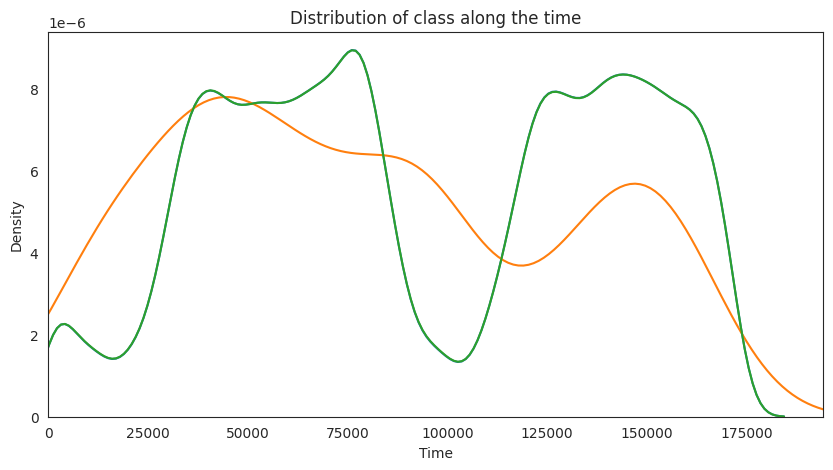

In [20]:
#Distribution of class along the time
#fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(20,4))
start=timer()

plt.figure(figsize=(10,5))

class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

sns.distplot(class_0,hist=False,rug=False,label='Not Fraud').set(xlim=0)
sns.distplot(class_1,hist=False,rug=False,label='Fraud')

sns.distplot(df.Time,hist=False,rug=False,label='All-Transactions')
plt.title ("Distribution of class along the time")
plt.show()

end = timer()
print("Duration ",end - start)

#Distribution of data for fraud and non-faud transactions are different. So it looks it can be useful in predction.
#But time field need to be scaled

In [21]:
#Analysis of Amount Field

max_amount=int(round(max(df.Amount) *1.04,-3))
bins=list(range(0,1601,100))
bins.append(max_amount)
df['Amt']=pd.cut(df.Amount,bins)

df.pivot_table(index="Amt",columns="Class",values="V1",aggfunc=len)
#Almost no fraud transaction of value more than $1600
#Most of the fraud are of <=$100

Duration  2.822474441000054


Class,0,1
Amt,,
"(0, 100]",226139.0,335.0
"(100, 200]",27626.0,45.0
"(200, 300]",10754.0,22.0
"(300, 400]",5516.0,21.0
"(400, 500]",3375.0,7.0
"(500, 600]",2148.0,7.0
"(600, 700]",1430.0,5.0
"(700, 800]",1072.0,9.0
"(800, 900]",820.0,3.0


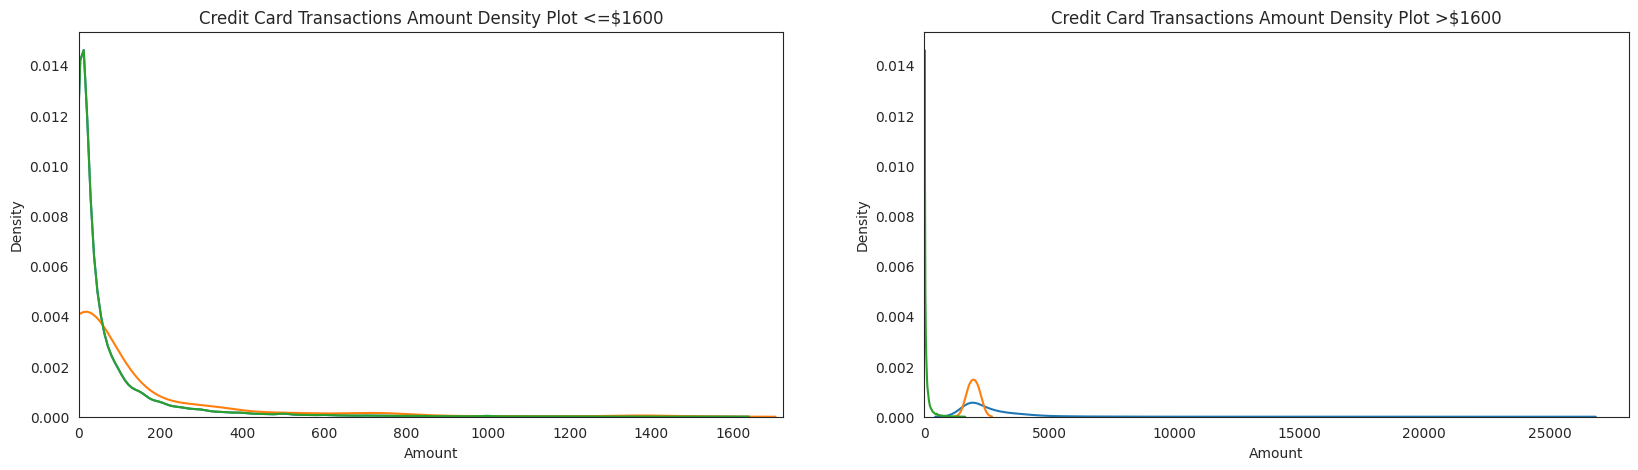

In [22]:
#fig,(ax1,ax2) = plt.subplots(ncols=3, figsize=(20,4))
plt.figure(figsize=(20,5))
plt.subplot(121)
class_0 = df.loc[ (df['Class'] == 0) & (df.Amount<=1600) ]["Amount"]
class_1 = df.loc[ (df['Class'] == 1) & (df.Amount<=1600) ]["Amount"]
class_All = df.loc[ (df.Amount<=1600) ]["Amount"]

sns.distplot(class_0,hist=False,rug=False,label='Not Fraud').set(xlim=0)
sns.distplot(class_1,hist=False,rug=False,label='Fraud')
sns.distplot(class_All,hist=False,rug=False,label='Total Amount')
plt.title('Credit Card Transactions Amount Density Plot <=$1600')

plt.subplot(122)
class_0 = df.loc[ (df['Class'] == 0) & (df.Amount>1600) ]["Amount"]
class_1 = df.loc[ (df['Class'] == 1) & (df.Amount>1600) ]["Amount"]
class_All = df.loc[ (df.Amount<=1600) ]["Amount"]
sns.distplot(class_0,hist=False,rug=False,label='Not Fraud').set(xlim=0)
sns.distplot(class_1,hist=False,rug=False,label='Fraud')
sns.distplot(class_All,hist=False,rug=False,label='Total Amount')
plt.title('Credit Card Transactions Amount Density Plot >$1600')
plt.show()

#For <=$1600 fraud and non-fraud distribution is almost overlap. It mean any amount of transaction
#can be fraud or non-fraud.
#For >$1600 there is some spike around $2500. It means transaction around $2500 are mose suspectible to be fraud.

#We need this field as well for prediction but we need to scale this as well.

Duration  62.95934301199998


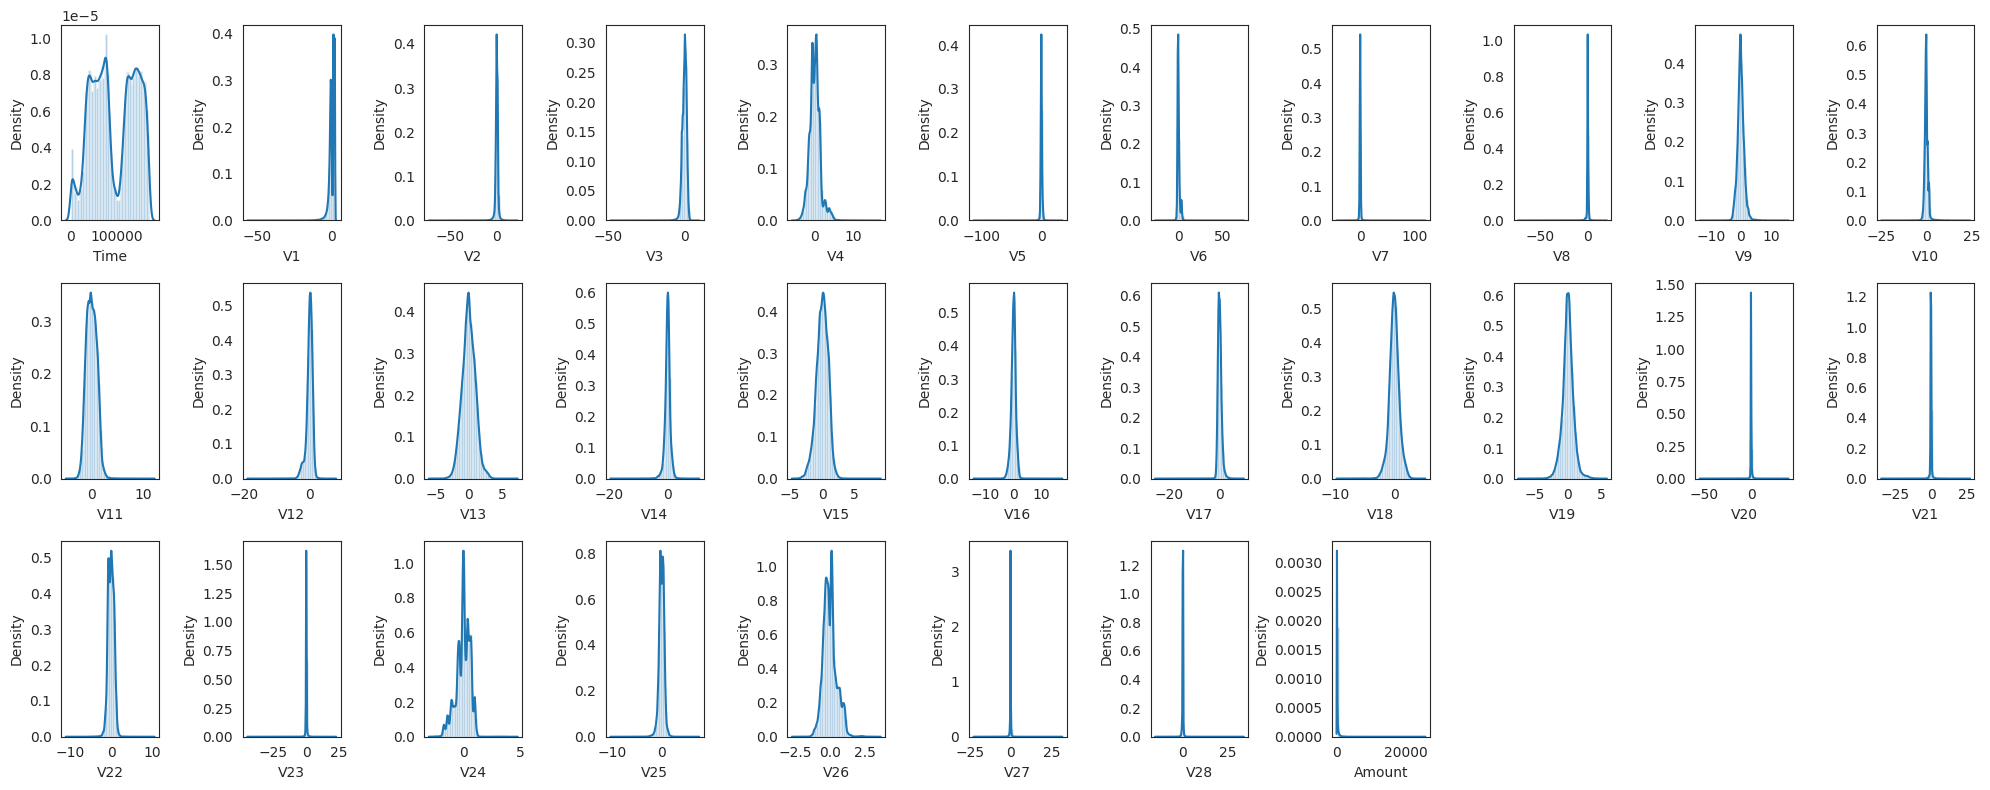

In [23]:
start = timer()
#Distribution of the data
plt.figure(figsize=(20,8))
i=1
for col in df.columns[0:30]:
    plt.subplot(3,11,i)
    sns.distplot(df[col])
    i+=1
plt.tight_layout()

end = timer()
print("Duration ",end - start)

#Except time and amount all fields looks having single peak bell curve. Allhough some of the fields are skwed right
#side and some looks skewed left side. So we can use power-transformer -yeo-johnson to handle this issue.

Here we will observe the distribution of our classes

In [33]:
df.groupby("Class")["Amount"].sum()

,Amount
Class,
0,25102462.04
1,60127.97


In [35]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

amt=100*df.groupby("Class")["Amount"].sum() / sum(df.Amount)

print ("Normal Transaction {:.2f}  Fraud Transaction {:.2f}  ".format (classes[0],classes[1]))
print ("Normal Transaction {:.2f}%  Fraud Transaction {:.2f}%  ".format (normal_share,fraud_share))
print ("Value of Normal Transaction {:.2f}%  Fraud Transaction {:.2f}%  ".format (amt[0],amt[1]))

fraud_amt=df.loc[df['Class'] == 1]["Amount"]
print ("\nAverage Value {:.2f} Min Value {:.2f}  Max Value {:.2f} Fraud Transactions".format( np.average(fraud_amt), np.min(fraud_amt), np.max(fraud_amt)))

fraud_0amt_trans=len ( df.loc[  (df['Class'] == 1) & (df['Amount']==0)  ] )
print ("\n# Fraud Transactions of 0 Value = ",fraud_0amt_trans)

Normal Transaction 284315.00  Fraud Transaction 492.00  
Normal Transaction 99.83%  Fraud Transaction 0.17%  
Value of Normal Transaction 99.76%  Fraud Transaction 0.24%  

Average Value 122.21 Min Value 0.00  Max Value 2125.87 Fraud Transactions

# Fraud Transactions of 0 Value =  27


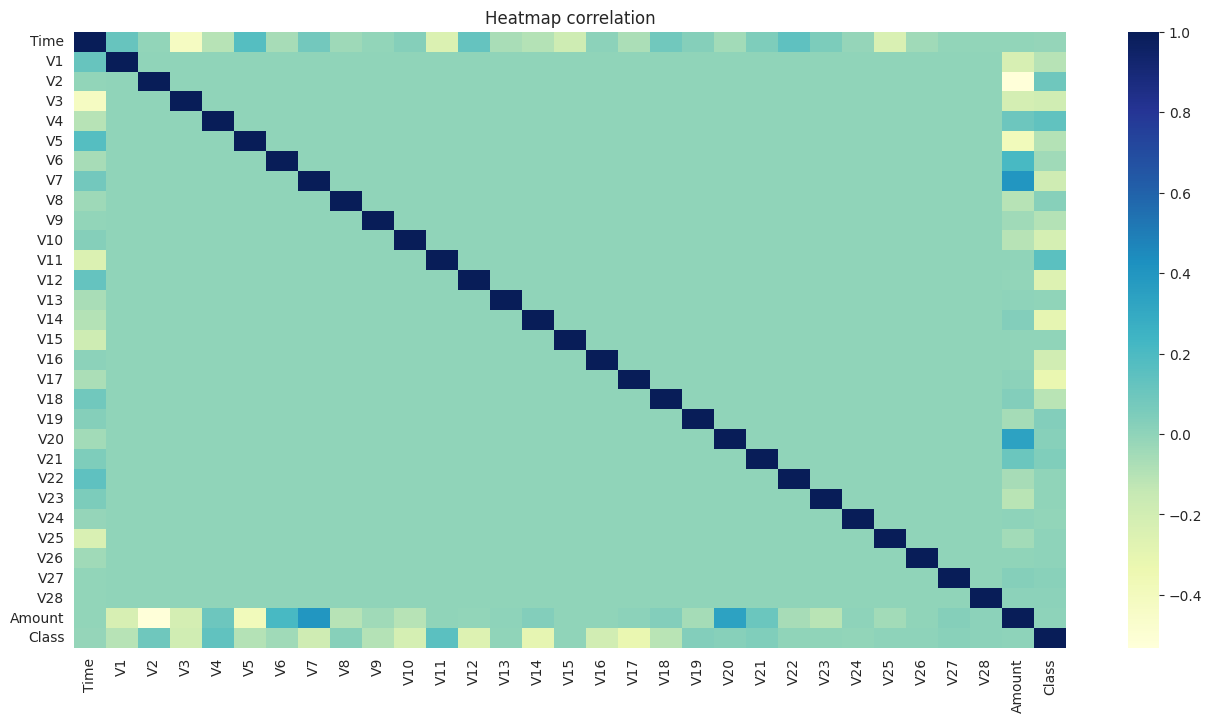

In [38]:
#Check Coorelation Between Different Variables
df_corr = df.select_dtypes(include="number").corr()
plt.figure(figsize=(16,8))
sns.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
#sns.set(font_scale=.5,style='white')

plt.title('Heatmap correlation')
plt.show()

#Since this is is PCA data it looks there is no relationship between the given variables. Except time and amount has
#some sort of relationship with other fields.

In [39]:
# Is there an relationship between variables and Class?
rank = pd.DataFrame(df_corr['Class']) #.sort_values(ascending=False)
rank['Relationship'] = rank.Class.apply(lambda x: "+" if x>0 else "-")
rank.Class=abs(rank.Class)
rank.rename(columns={"Class":"Degree"}, inplace=True)
rank.sort_values("Degree", ascending=False)

#Some variables show positive relationship with fraud and some negative. For example V17 & Fraud share share -ve
#relation. More the value of V17 lesser are the chances of this being fraud.
#V11 has +ve relationship. More the value of V11 more are the chances that transation is fraud.

,Degree,Relationship
Class,1.000000,+
V17,0.326481,-
V14,0.302544,-
V12,0.260593,-
V10,0.216883,-
V16,0.196539,-
V3,0.192961,-
V7,0.187257,-
V11,0.154876,+
V4,0.133447,+


#### <font color=red>Note 1: Because I don't have enough computing resources available (I tried nimblebox, google colab but that also too slow), therfore I am NOT using full given dataset for the model building.</font> </br>
#### <font color=red>Note 2: We need to have modular code to run same models with different parameters and differnt data imbalance treatment otherwise it will be extremely difficult to maintain the code. Therefore I have taken different approach. Which you can observer while scanning and running the code.
</font>

In [40]:
df.drop(columns="Amt", inplace=True) #This field was created for binning purpose so not required for modeling

In [41]:
#Training model on huge dataset taking too much time so taking 5% of data initially.
#When code start working fine and start doing reasonable prediction disable below line
#If you have enough resources you can disable this cell

df = pd.concat([ df.sample(frac=.05, random_state=1),df.loc[df.Class==1] ])
print (df.shape)

(14732, 31)


In [129]:
# #Distribution of data acrros 2 Classes
# start=timer()

# color = sns.color_palette("Set1", 6)
# plt.figure(figsize=(20,20))
# i=1

# for col in df.columns:
#     plt.subplot(8,4,i)
#     ax=sns.boxplot(x=df['Class'],y=df[col],  palette=color)

#     for p in ax.patches:
#         ax.annotate(format(p.get_height(), '.2f'),
#                 (p.get_x() + p.get_width() / 2.,
#                  p.get_height()), ha = 'center', va = 'center',
#                 fontsize=8,
#                 xytext = (0, 10), textcoords = 'offset points')
#     i+=1
# plt.tight_layout()

# end = timer()
# print("Duration ",end - start)

# #Almost all fields has outlier values.

Duration  8.726772724000057


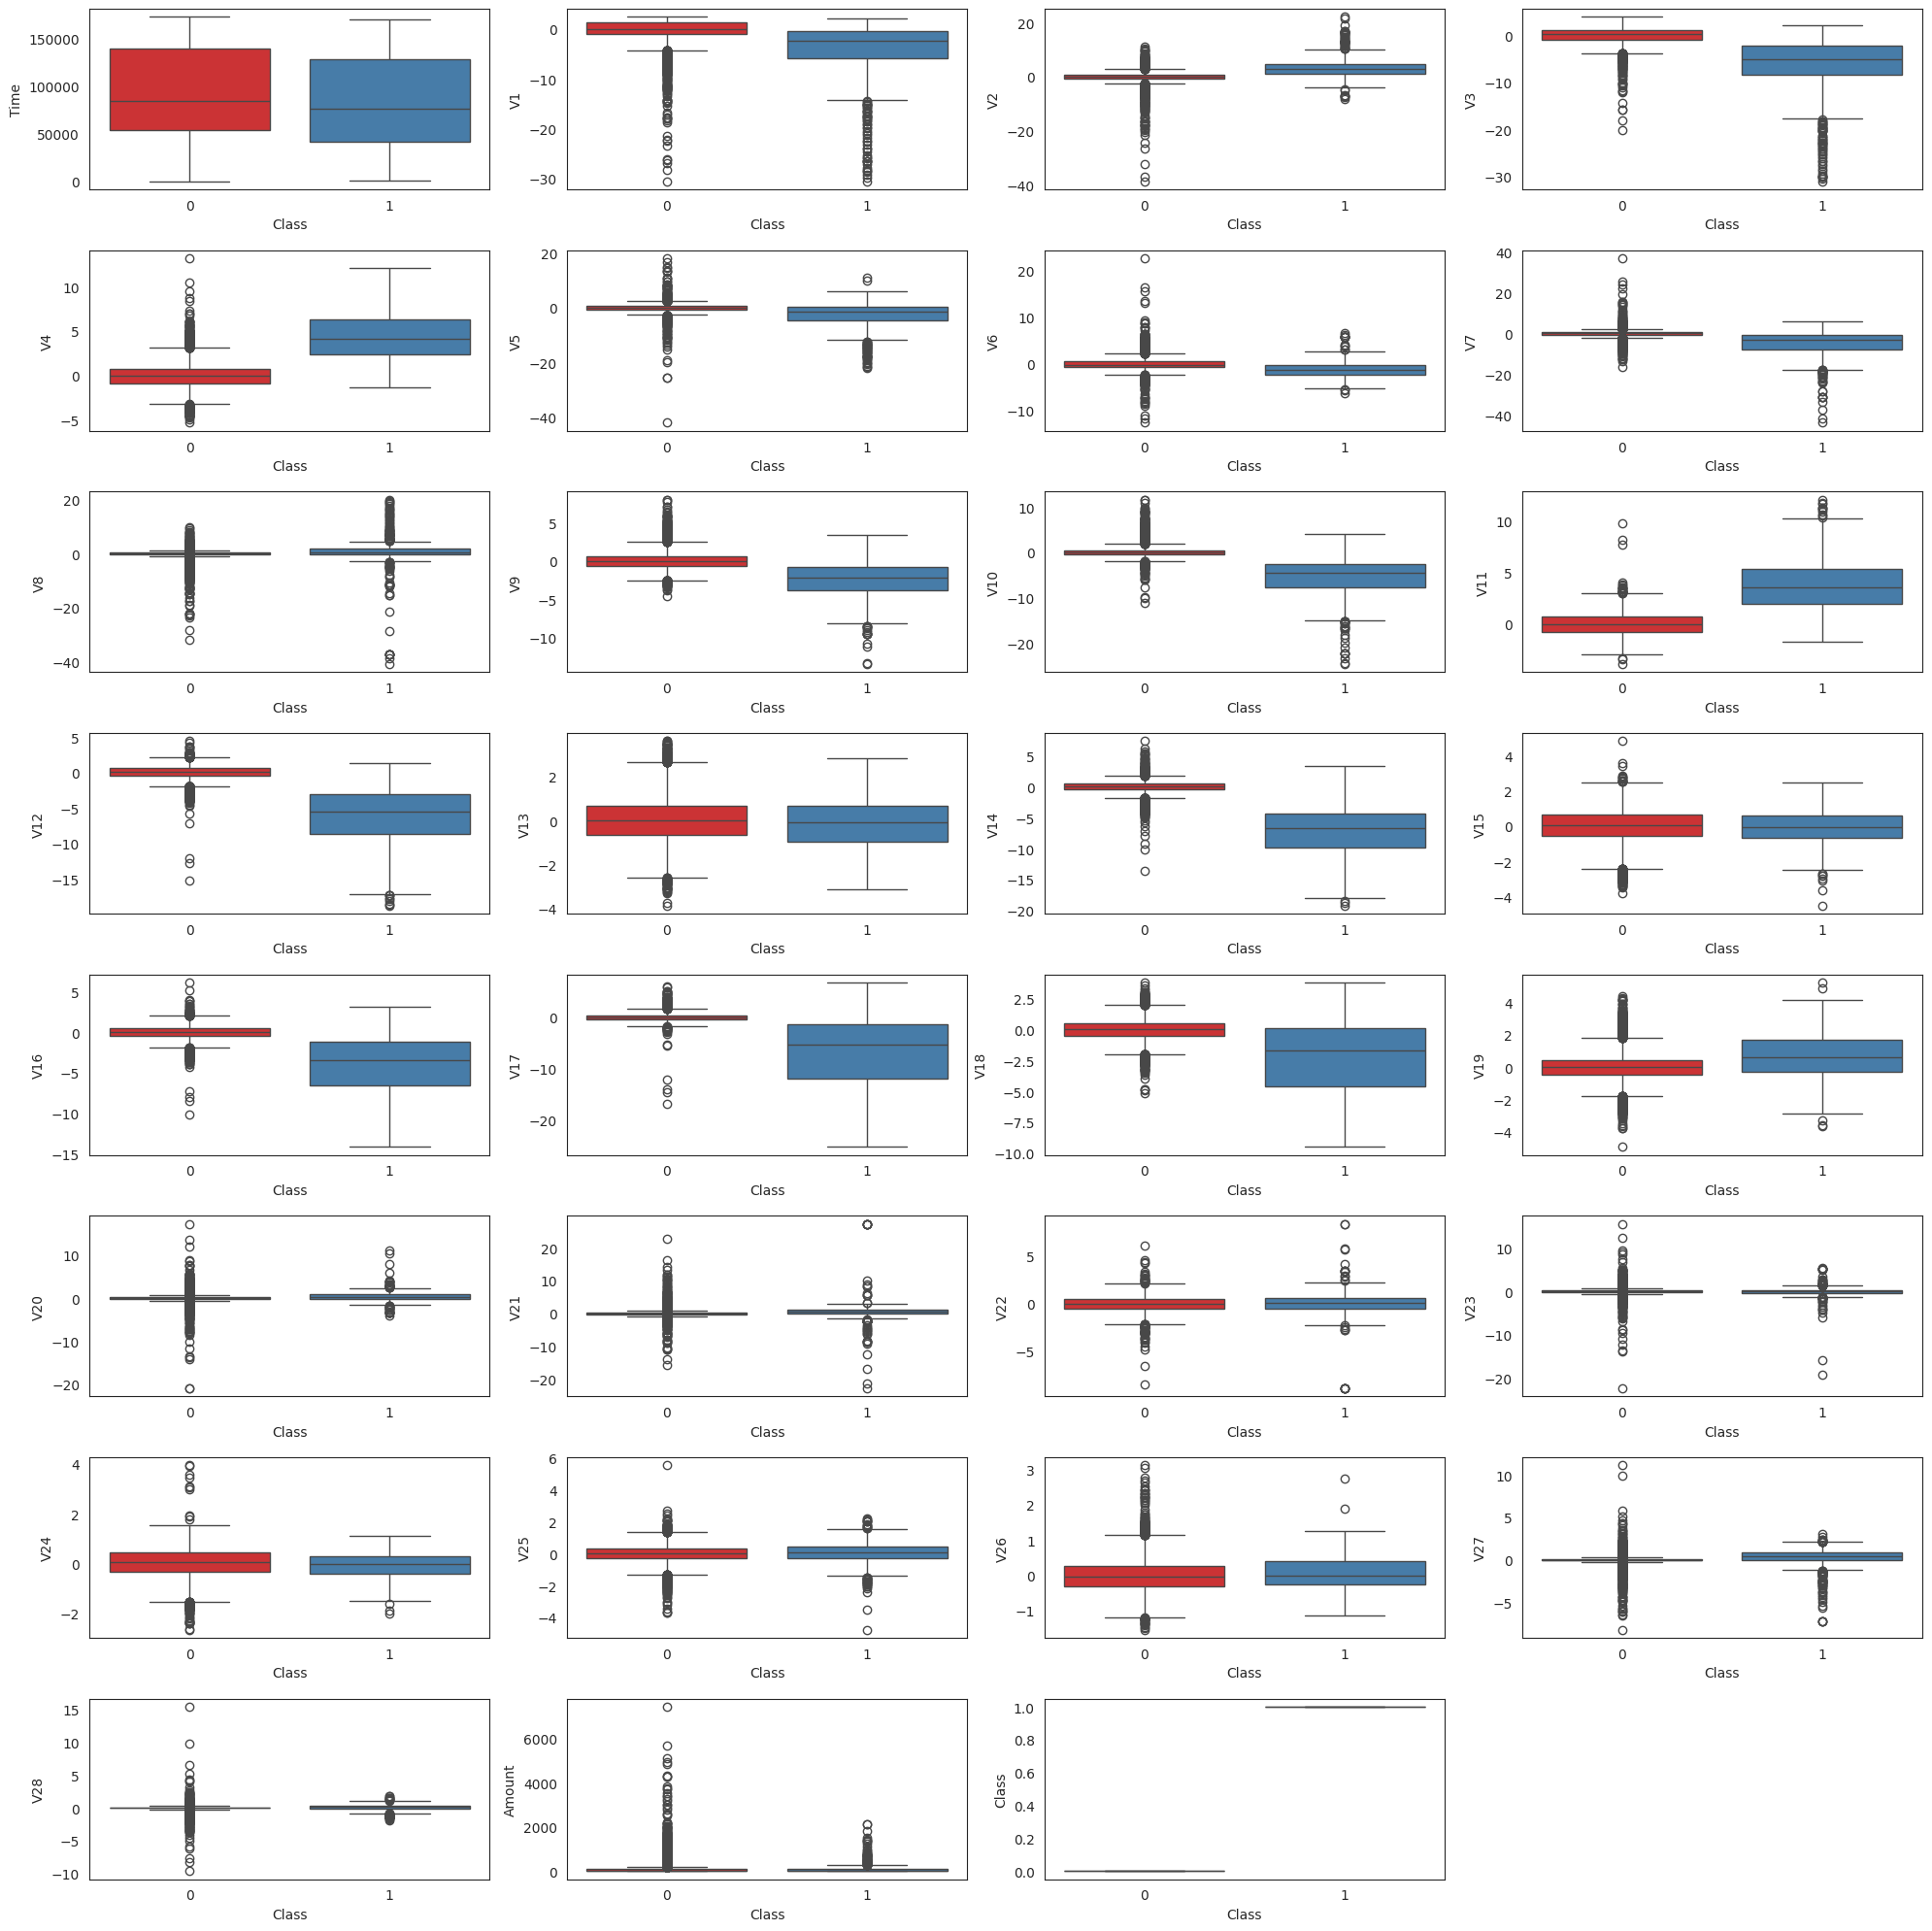

In [43]:
#Distribution of data across 2 Classes
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import default_timer as timer

start = timer()

color = sns.color_palette("Set1", 6)
plt.figure(figsize=(20, 20))
i = 1

for col in df.columns:
    plt.subplot(8, 4, i)
    ax = sns.boxplot(x=df['Class'], y=df[col], palette=color)

    # Iterate through the boxes instead of all patches
    for box in ax.artists:
        # Get the height of the box
        height = box.get_height() if hasattr(box, 'get_height') else box.get_ydata()[1] - box.get_ydata()[0]
        # Annotate the height on top of the box
        ax.annotate(format(height, '.2f'),
                    (box.get_x() + box.get_width() / 2.,
                     height), ha='center', va='center',
                    fontsize=8,
                    xytext=(0, 10), textcoords='offset points')
    i += 1
plt.tight_layout()

end = timer()
print("Duration ", end - start)

# Almost all fields has outlier values.

### Standard Scale All the Fields Including Time and Amount

In [44]:
cols2Scale = list(df.columns)
cols2Scale.remove("Class")

In [45]:
sc=StandardScaler()
t=sc.fit_transform(df[ cols2Scale ])
df[cols2Scale] = t
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.542165,-0.177345,-0.446889,0.030154,-0.228183,1.201262,-1.422117,0.234010,-0.295085,0.343262,0.150528,-0.750772,0.442264,0.619634,0.068656,-0.674005,-0.107599,-0.199274,-0.783185,-0.269573,-0.255168,-0.100090,0.054402,0.560594,0.045778,-4.178695,-0.439237,0.128913,0.621116,-0.366883,0
127467,-0.331670,-0.259693,0.624082,0.666552,-0.079212,-0.088448,-0.441464,0.248051,0.245784,-0.502037,-0.242045,-0.021675,0.537761,0.781292,0.330012,1.039792,0.031051,0.182048,-0.842735,-0.591388,-0.023590,-0.150447,-0.484577,0.126908,0.671032,-0.483813,0.140878,0.323596,0.174706,-0.366102,0
137900,-0.246697,-0.058260,0.521235,0.511859,-0.170388,0.387885,-0.354232,0.433936,-0.036744,-0.310330,-0.199713,-0.719470,0.187087,1.134460,-0.245658,0.938807,0.546127,-0.063311,0.090487,0.221716,0.242750,-0.317123,-1.013192,-0.193848,-0.813582,-0.025858,0.225411,0.499397,0.265961,-0.370581,0
21513,-1.311793,-0.468064,0.469844,0.858443,-1.025369,0.004749,-0.300565,0.422154,-0.017949,0.363467,0.305515,0.598643,-0.041322,-1.323179,0.120019,0.227397,0.685182,-0.409017,0.399852,-0.181219,0.378720,-0.237372,-0.550239,-0.366248,0.023474,0.447355,1.651165,0.194458,-0.001208,-0.308567,0
134700,-0.277369,0.588818,0.264123,-0.154097,0.424096,0.104763,-1.028762,0.273245,-0.162085,-0.009051,-0.298171,-0.017832,-0.132346,-0.625392,-0.554585,1.122121,0.540382,0.669377,0.376720,-0.458005,-0.142779,-0.180186,-0.565064,-0.123361,0.435239,1.049465,0.738112,-0.075573,0.125718,-0.371115,0


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,14732.0,-4.147887e-17,1.000034,-1.978474,-0.849607,-0.210434,0.946203,1.653384
V1,14732.0,0.000000e+00,1.000034,-12.324738,-0.327370,0.051949,0.597035,1.049218
V2,14732.0,-1.157550e-17,1.000034,-19.890465,-0.350989,-0.008073,0.386491,11.256507
V3,14732.0,1.543400e-17,1.000034,-13.287414,-0.341948,0.156732,0.534379,1.783252
V4,14732.0,7.717000e-18,1.000034,-3.206814,-0.572477,-0.069034,0.395687,7.670043
V5,14732.0,1.157550e-17,1.000034,-23.426401,-0.348161,0.024155,0.403421,10.168539
V6,14732.0,3.858500e-18,1.000034,-9.096731,-0.539360,-0.178573,0.307275,16.203026
V7,14732.0,7.717000e-18,1.000034,-20.953869,-0.198978,0.099392,0.358163,17.814875
V8,14732.0,4.340812e-18,1.000034,-23.148860,-0.117662,0.018177,0.197899,11.283861
V9,14732.0,-1.543400e-17,1.000034,-10.626995,-0.500331,0.009385,0.534383,6.371375


### Plotting the distribution of a variable- After Scaling

Duration  8.933011732000068


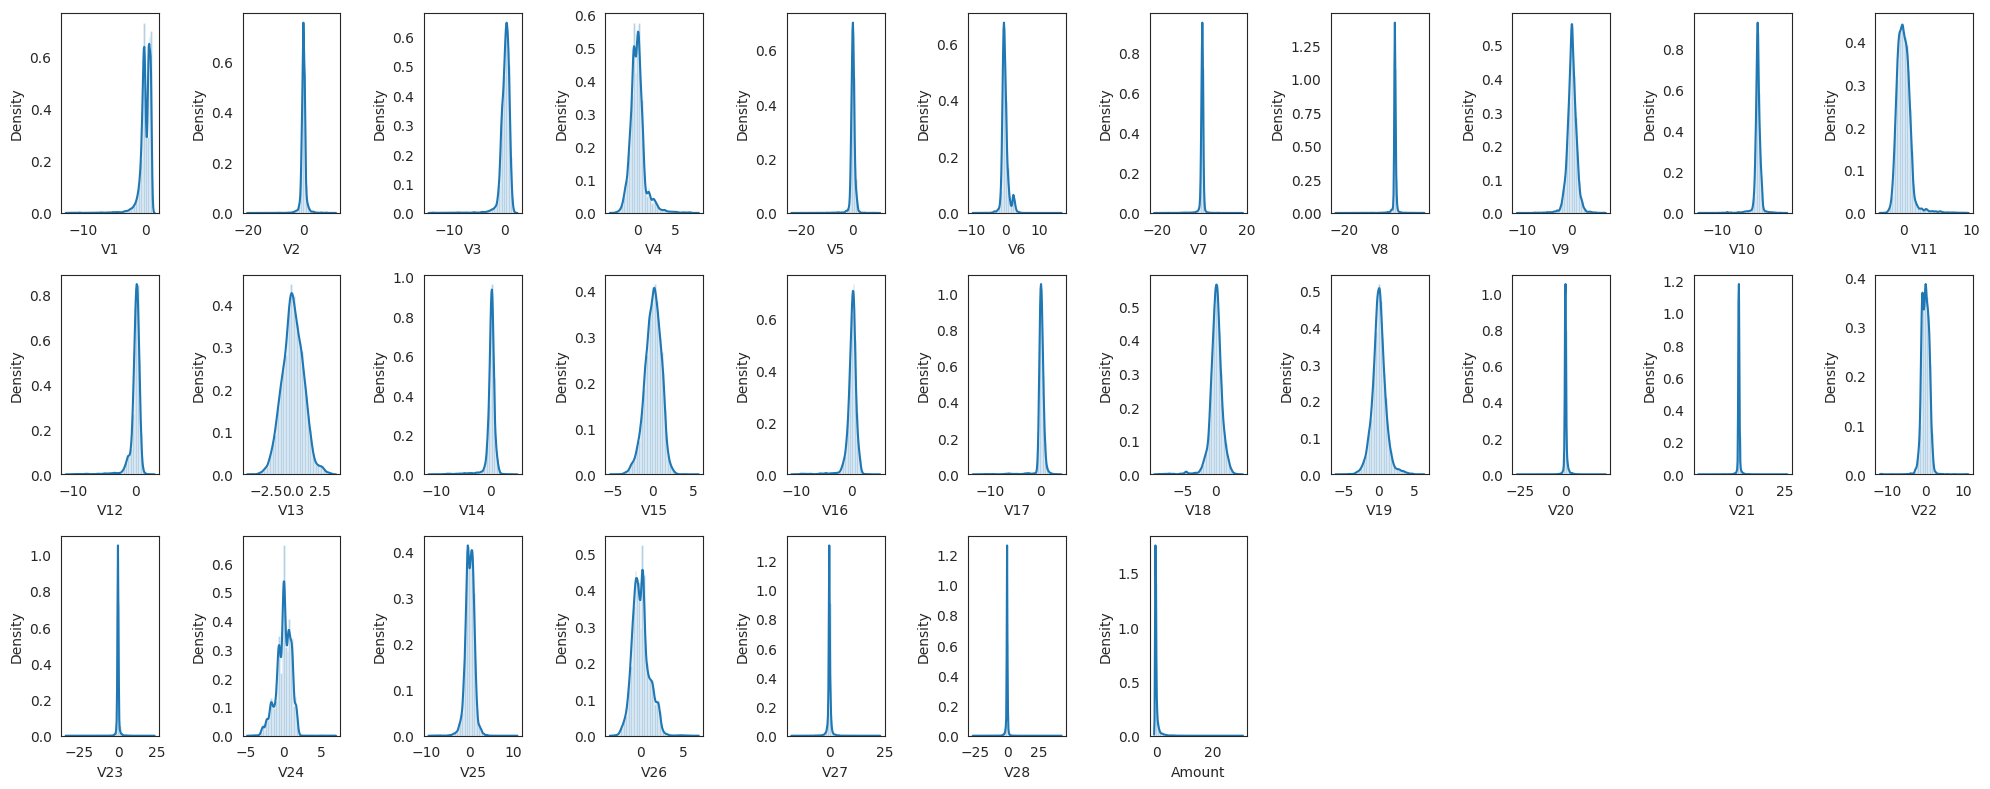

In [47]:
# plot the histogram of a variable from the dataset to see the skewness
#Distribution of the data
start=timer()

plt.figure(figsize=(20,8))
i=1
for col in df.columns[1:30]:
    plt.subplot(3,11,i)
    sns.distplot(df[col])
    i+=1
plt.tight_layout()

end = timer()
print("Duration ",end - start)

### Some fields are still skewed. So using PowerTransformer to fix that issue.
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [48]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
#'yeo-johnson’ [1], works with positive and negative values
#‘box-cox’ [2], only works with strictly positive values

df[cols2Scale] = power_transform(df[cols2Scale], method='yeo-johnson')

### Plotting the distribution of a variable- After Correcting Skweness Issue

Duration  8.573603019000075


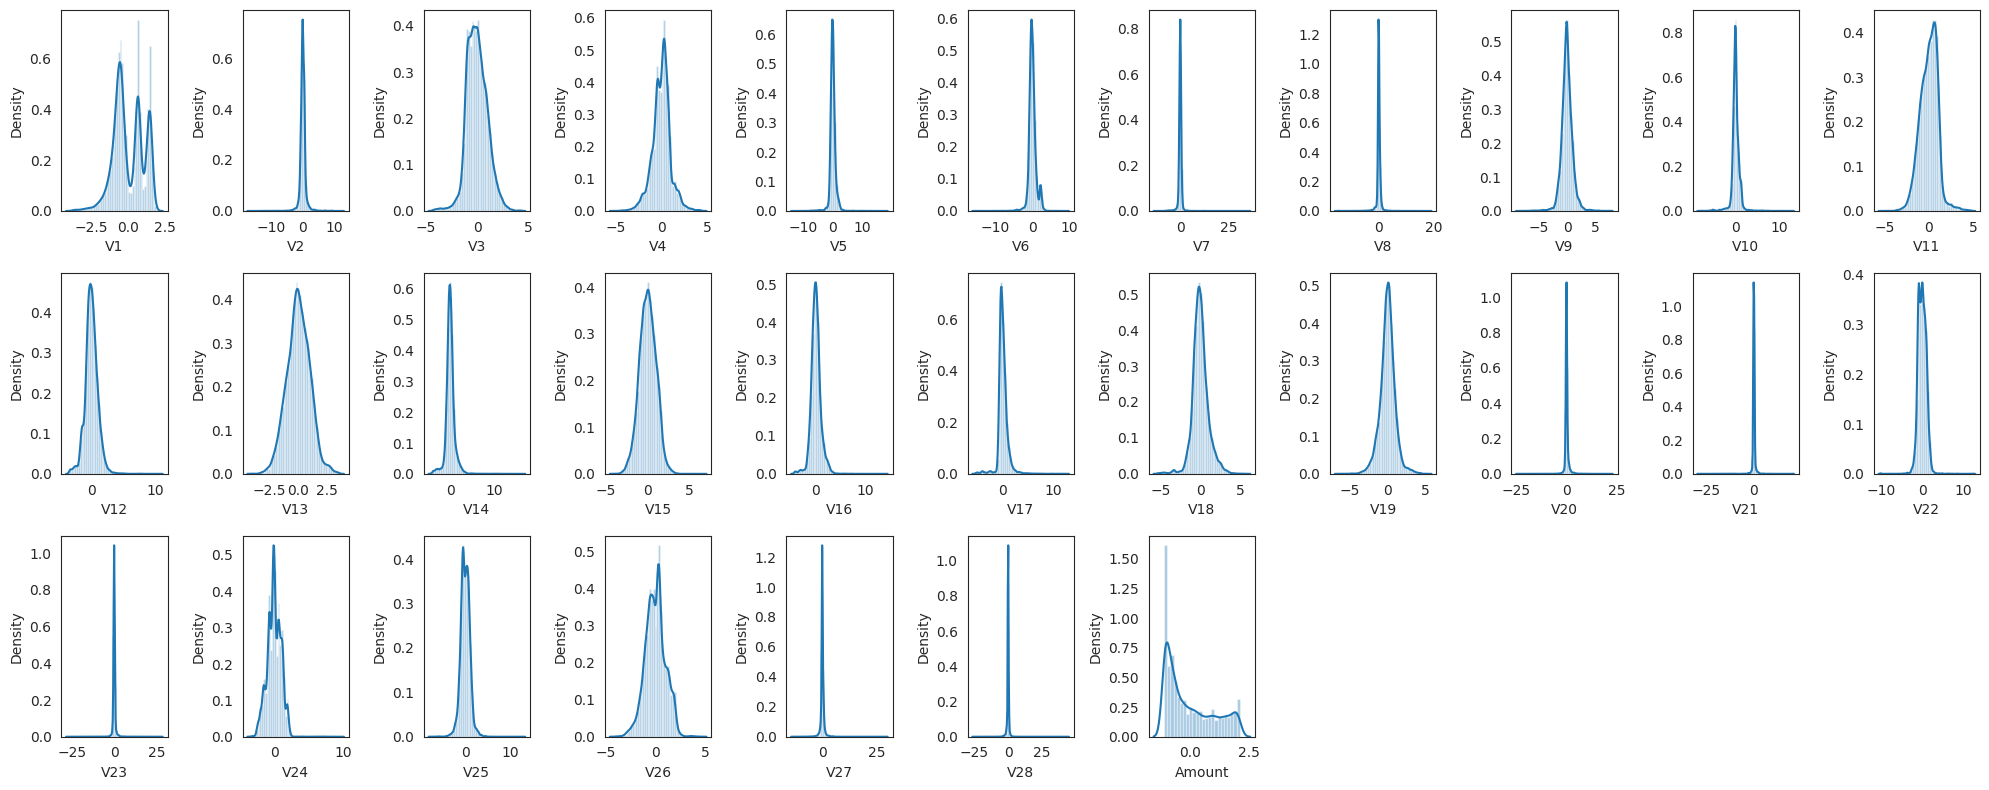

In [49]:
# plot the histogram of a variable from the dataset to see the skewness
#Distribution of the data
start=timer()

plt.figure(figsize=(20,8))
i=1
for col in df.columns[1:30]:
    plt.subplot(3,11,i)
    sns.distplot(df[col])
    i+=1
plt.tight_layout()

end = timer()
print("Duration ",end - start)

### Check the outliers after fixing skewness & scale issue

In [130]:
# #Distribution of data acrros 2 Classes
# start=timer()

# color = sns.color_palette("Set1", 6)
# plt.figure(figsize=(20,20))
# i=1

# for col in df.columns:
#     plt.subplot(8,4,i)
#     ax=sns.boxplot(x=df['Class'],y=df[col],  palette=color)

#     for p in ax.patches:
#         ax.annotate(format(p.get_height(), '.2f'),
#                 (p.get_x() + p.get_width() / 2.,
#                  p.get_height()), ha = 'center', va = 'center',
#                 fontsize=8,
#                 xytext = (0, 10), textcoords = 'offset points')
#     i+=1
# plt.tight_layout()

# end = timer()
# print("Duration ",end - start)

# #Many ields still has outlier values.

Duration  6.866011285000241


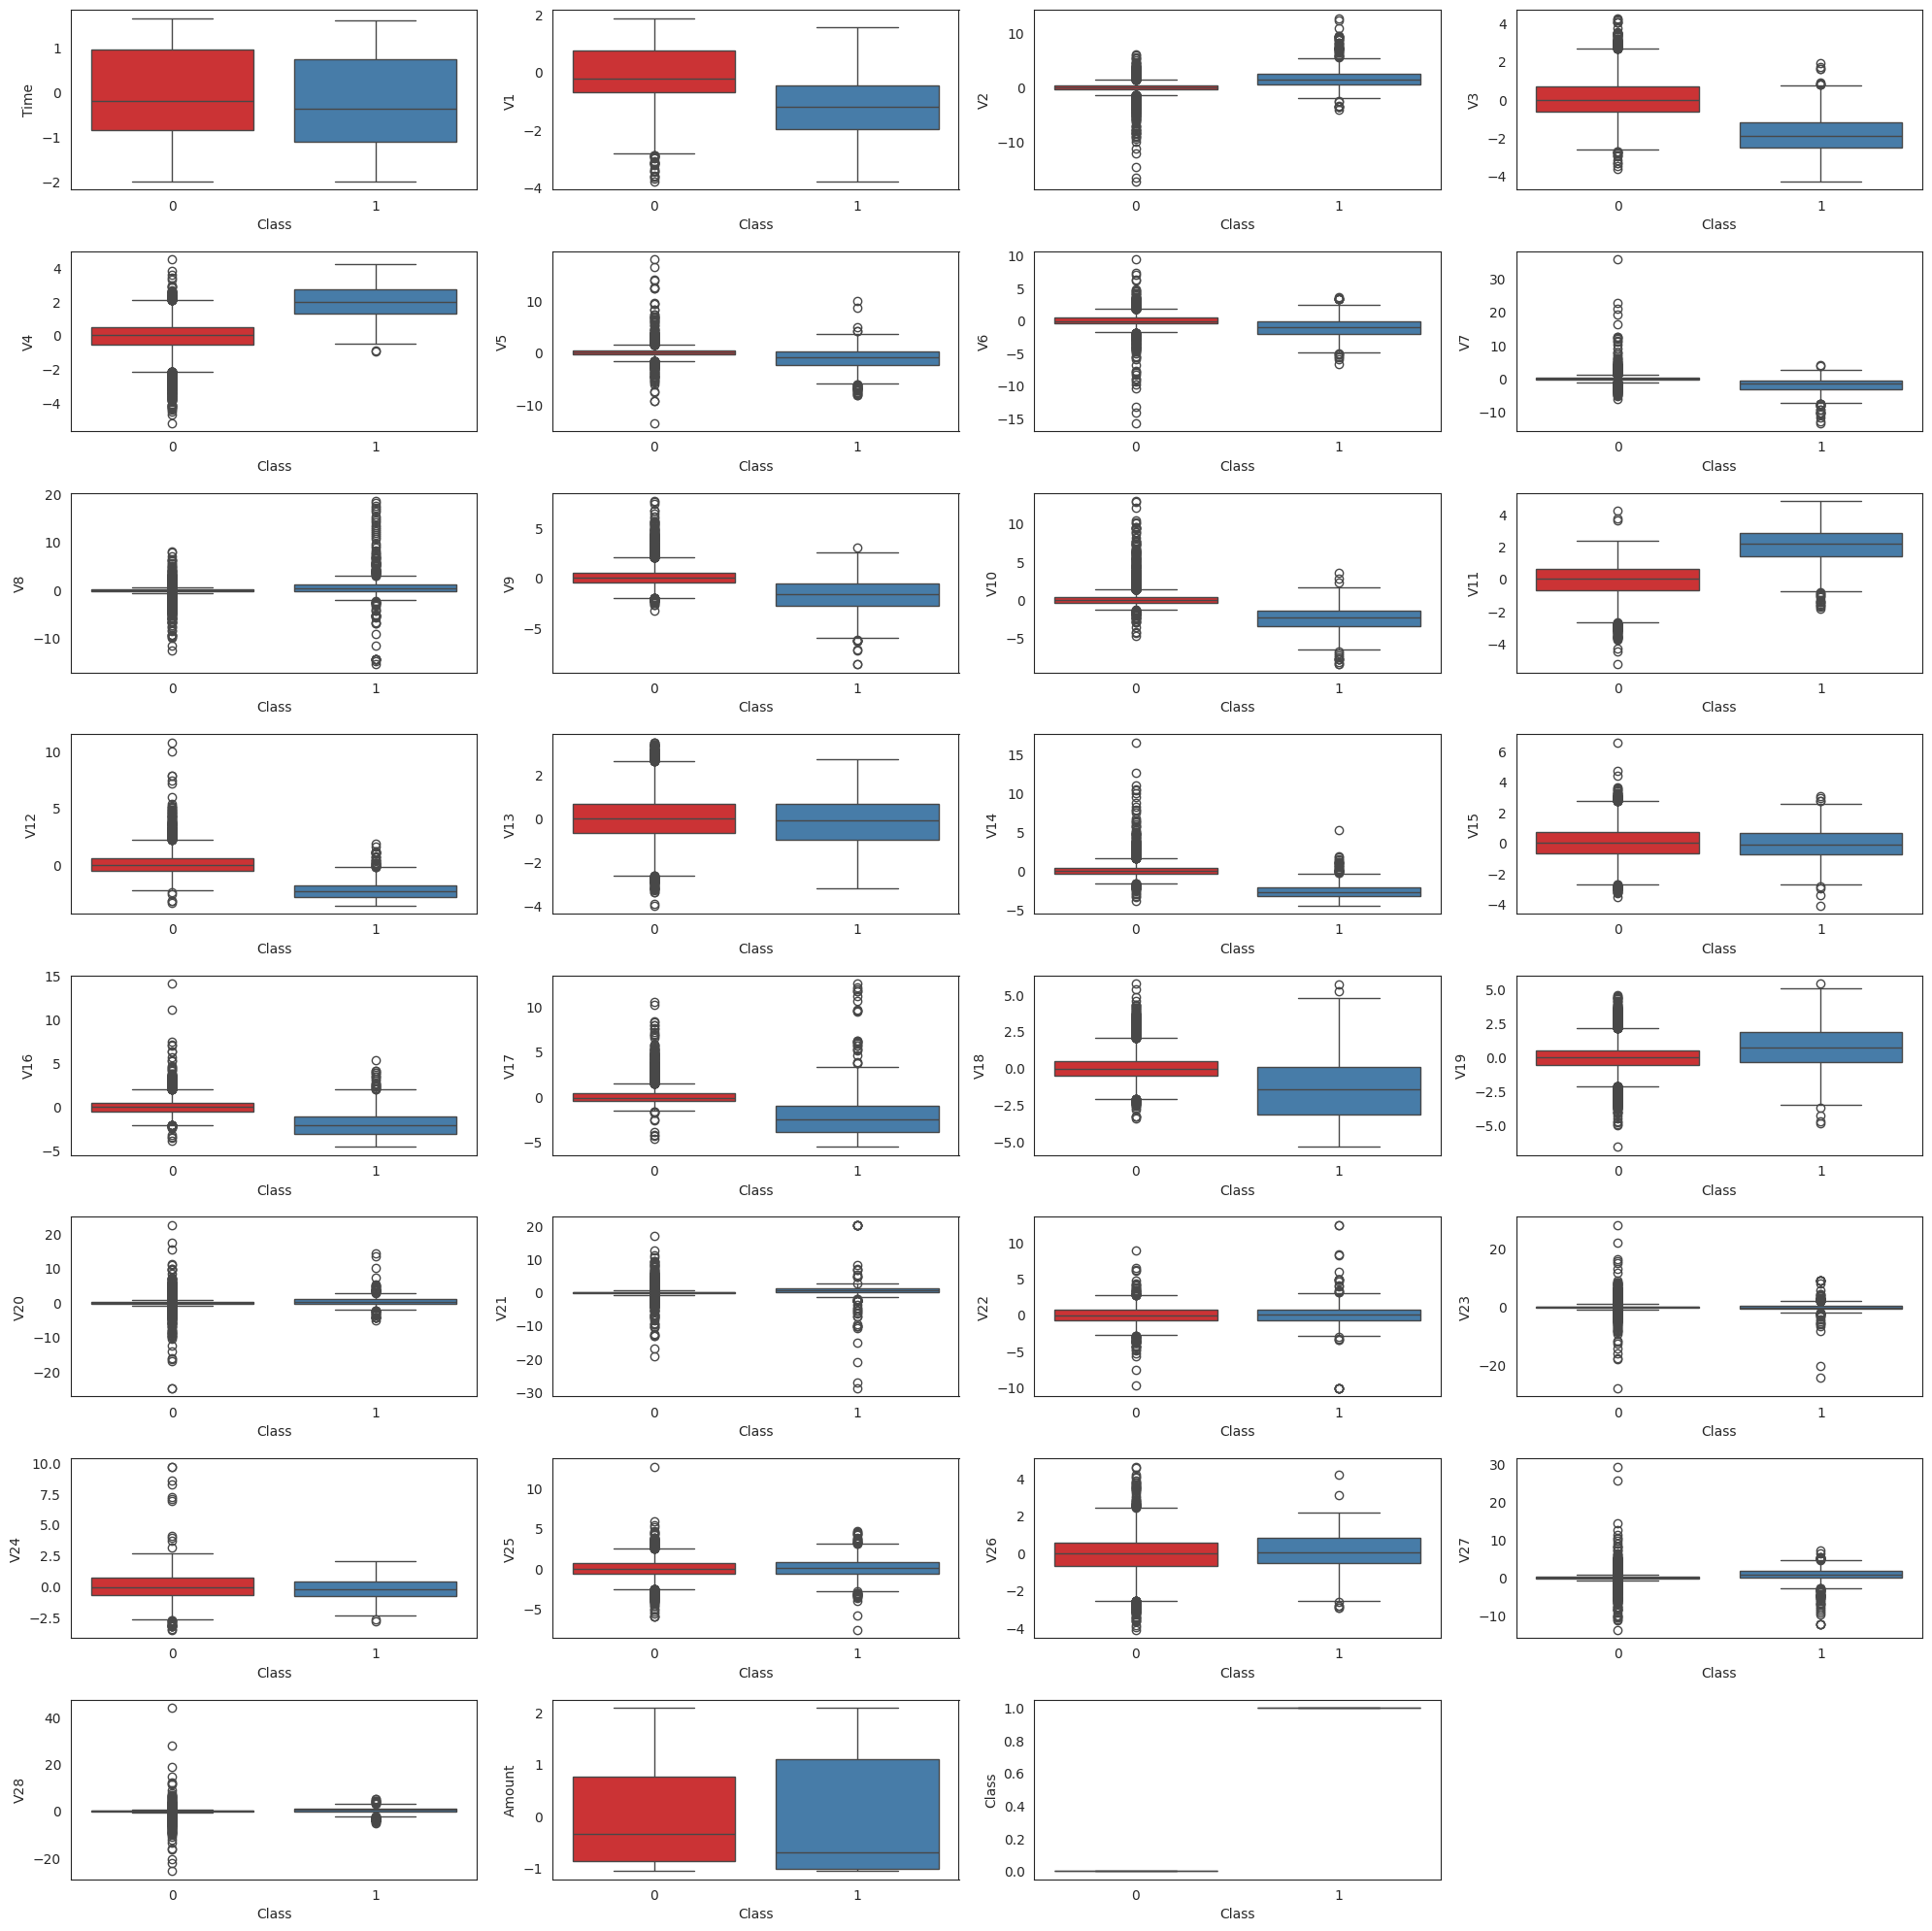

In [56]:
#Distribution of data acrros 2 Classes
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import default_timer as timer

start=timer()

color = sns.color_palette("Set1", 6)
plt.figure(figsize=(20,20))
i=1

for col in df.columns:
    plt.subplot(8,4,i)
    ax=sns.boxplot(x=df['Class'],y=df[col],  palette=color)

    # Iterate through the boxes and extract statistical information
    for box in ax.artists:
        # Get the median (or other desired statistic)
        median = box.get_ydata()[1]  # Median is the second element in ydata

        # Annotate the box with the median value
        ax.annotate(format(median, '.2f'),
                    (box.get_x() + box.get_width() / 2.,
                     median), ha = 'center', va = 'center',
                    fontsize=8,
                    xytext = (0, 10), textcoords = 'offset points')
    i+=1
plt.tight_layout()

end = timer()
print("Duration ",end - start)

#Many ields still has outlier values.

In [59]:
# <font color=blue> Section 2: Splitting the data into Train & Test

In [60]:
X= df.drop(columns=["Class"], axis=0)
y= df.Class #class variable

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,stratify=y, test_size=0.25, random_state=100)

In [61]:
ros = over_sampling.RandomOverSampler(random_state=100)
X_train_ros, y_train_ros       = ros.fit_resample(X_train1, y_train1)
X_test_ros,  y_test_ros        = ros.fit_resample(X_test1, y_test1)

smt = over_sampling.SMOTE(random_state=100)
X_train_smote, y_train_smote   = smt.fit_resample(X_train1, y_train1)
X_test_smote,  y_test_smote    = smt.fit_resample(X_test1, y_test1)

ada = over_sampling.ADASYN(random_state=100)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train1, y_train1)
X_test_adasyn,  y_test_adasyn  = ada.fit_resample(X_test1, y_test1)

# <font color=blue> Section 3: Select the Dataset Imbalancing Method</font>
Before you proceed for Section 4 this shall be done. It means every time you want to choose different imbalancing method you should start from here

## <font color=red> WARNING!!! Before you goto Section 4, Select which type of data you want to use for model.</font>

In [62]:
model_with_data_list=['Normal','RandomOverSampler','Smote','AdaSyn']
option=-1
while not (option>=0 and option<=3):
    i = input('0-Normal, 1-RandomOverSampler, 2-Smote, 3-AdaSyn ')
    try:
        option=int(i)
    except:
        option=-1

if option==0:
    X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.25, random_state=100)
elif option==1:
    X_train, X_test, y_train, y_test = X_train_ros, X_test_ros, y_train_ros , y_test_ros
elif option==2:
    X_train, X_test, y_train, y_test = X_train_smote, X_test_smote, y_train_smote , y_test_smote
elif option==3:
    X_train, X_test, y_train, y_test = X_train_adasyn, X_test_adasyn, y_train_adasyn , y_test_adasyn

print ("\n\nRunning Model with ",model_with_data_list[option]," Data")

0-Normal, 1-RandomOverSampler, 2-Smote, 3-AdaSyn 0


Running Model with  Normal  Data


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [63]:
print(np.sum(y_train) + np.sum(y_test))
print(np.sum(y_train))
print(np.sum(y_test))

512
384
128


# <font color=blue> Section 4: Model Building </font>

In [64]:
# Plotting cv results
def draw_cv_results(cv_df, param_name, metric_name, title_name, log_true):
    plt.figure(figsize=(10,4))

    if log_true:
        x_axis= np.log10( list(cv_df[param_name]))
        x_axis_title = "Log Value "+param_name
    else:
        x_axis = list(cv_df[param_name])
        x_axis_title = param_name

    plt.plot( x_axis, cv_df['mean_train_score'] )
    plt.plot( x_axis, cv_df['mean_test_score'] )
    plt.xlabel(x_axis_title)
    plt.ylabel(metric_name)
    plt.title(title_name)
    plt.legend(['Train ' + metric_name +' score', 'Test ' +metric_name+' score'], loc='upper left')


In [65]:
# Function to plot the confusion Matrix
def draw_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.tab10):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)

    fmt = 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.fill(j,i,facecolor="red" if cm[i, j] < thresh else "blue", edgecolor='b', linewidth=2)
        #plt.Rectangle((0, 0), 1, 0, linewidth=1, edgecolor='b', facecolor='none')

        plt.text(j, i, format(cm[i, j], fmt), fontsize=20, weight="bold",
                 verticalalignment='center',
                 horizontalalignment="center",
                 color="white",

                bbox=dict(facecolor='red', alpha=0.8))

    plt.tight_layout()
    plt.ylabel('True label',fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)

In [66]:
class_names=[0,1]
def draw_roc( actual, probs, prob_values=True, Threshold_limit=0.5 ):
    if prob_values:
        pred= probs.map(lambda x: 1 if x > Threshold_limit else 0)
    else:
        pred= probs

    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                          drop_intermediate = False )

    auc_score = round( metrics.roc_auc_score( actual, probs) ,2)

    recall    = round( metrics.recall_score(actual,pred),2)
    precision = round(metrics.precision_score(actual, pred),2)
    f1= round(metrics.f1_score(actual,pred),2)
    print ("This Model Result is for ", model_with_data_list[option], " Data")
    print ("ROC AUC Score on Test:",auc_score)

    plt.figure(figsize=(20, 5))
    plt.subplot(1,2,1)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]',fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('Receiver operating characteristic example',fontsize=20)
    plt.legend(loc="lower right")

    plt.subplot(1,2,2)
    cm = confusion_matrix(actual, pred)
    draw_confusion_matrix(cm,class_names)
    plt.show()

    return auc_score,recall,precision,f1

In [67]:
X_train.shape, y_train.shape

((11049, 30), (11049,))

### Model 1: Logistic Regression

In [68]:
# Cross validation using different values of C. Let's check which value of C gives best result
start=timer()
if run_cv:
    hyper_params = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }]

    lr = LogisticRegression(max_iter=1000, random_state=100)
    lr.fit(X_train, y_train)

    model_cv_logistic = GridSearchCV(estimator=lr, param_grid=hyper_params, \
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_logistic.fit(X_train,  y_train)

    cv_results_lr = pd.DataFrame(model_cv_logistic.cv_results_)
    print(cv_results_lr)

end = timer()
print("Duration ",end - start)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time   param_C  \
0       0.057165      0.006138         0.017180        0.006455     0.001   
1       0.030369      0.006900         0.008300        0.001176     0.010   
2       0.031169      0.002647         0.007835        0.000825     0.100   
3       0.035100      0.001848         0.007600        0.000424     1.000   
4       0.036177      0.003555         0.007304        0.000061    10.000   
5       0.039454      0.010319         0.007564        0.000153   100.000   
6       0.036594      0.002449         0.007629        0.000174  1000.000   

         params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.001}           0.957069           0.979408           0.973362   
1   {'C': 0.01}           0.959273           0.988267           0.978337   
2    {'C': 0.1}           0.959925           0.990532           0.976431   
3      {'C': 1}    

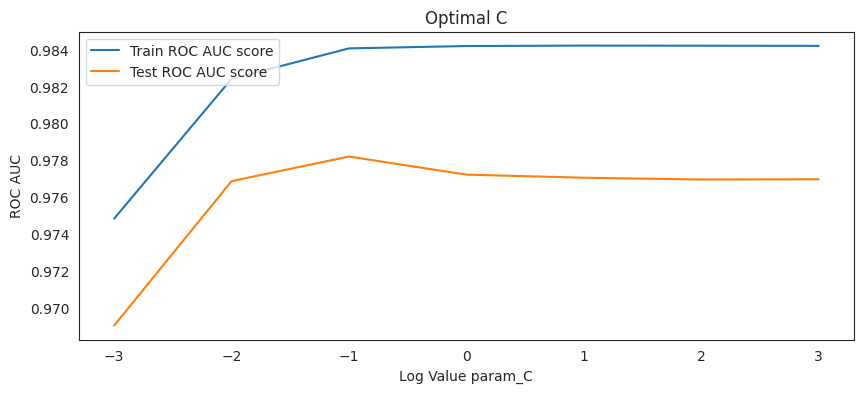

In [69]:
if run_cv:
    draw_cv_results(cv_results_lr, 'param_C', 'ROC AUC', 'Optimal C', True)

In [72]:
if run_cv:
    model_cv_logistic.best_estimator_

In [75]:
# #There are 29 variables in X_train. Let's see can we manage good result with lessor variables.
# if option==0 or option==1:
#     lr = LogisticRegression(C=.1,max_iter=1000, random_state=100) #Value of C & max_iter from earlier steps #for normal
# elif option==2:
#     lr = LogisticRegression(C=10,max_iter=1000, random_state=100) #Value of C & max_iter from earlier steps #for smote
# else:
#     lr = LogisticRegression(C=100,max_iter=1000, random_state=100) #Value of C & max_iter from earlier steps #for adasyn
# rfe = RFE(lr,15) #Identify top 15 important variables
# rfe.fit(X_train,y_train)
# useful_cols = X_train.columns[rfe.support_]
# print ("Useful Columns: " ,useful_cols)

In [74]:
#There are 29 variables in X_train. Let's see can we manage good result with lessor variables.
if option==0 or option==1:
    lr = LogisticRegression(C=.1,max_iter=1000, random_state=100) #Value of C & max_iter from earlier steps #for normal
elif option==2:
    lr = LogisticRegression(C=10,max_iter=1000, random_state=100) #Value of C & max_iter from earlier steps #for smote
else:
    lr = LogisticRegression(C=100,max_iter=1000, random_state=100) #Value of C & max_iter from earlier steps #for adasyn
# Pass n_features_to_select as a keyword argument instead of positional argument
rfe = RFE(estimator=lr, n_features_to_select=15) #Identify top 15 important variables
rfe.fit(X_train,y_train)
useful_cols = X_train.columns[rfe.support_]
print ("Useful Columns: " ,useful_cols)

Useful Columns:  Index(['V1', 'V3', 'V4', 'V7', 'V8', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15',
       'V16', 'V19', 'V23', 'Amount'],
      dtype='object')


In [ ]:
#check the ranking of these variables
#list(zip(X_train.columns, rfe.support_, rfe.ranking_))

This Model Result is for  Normal  Data
ROC AUC Score on Test: 0.98


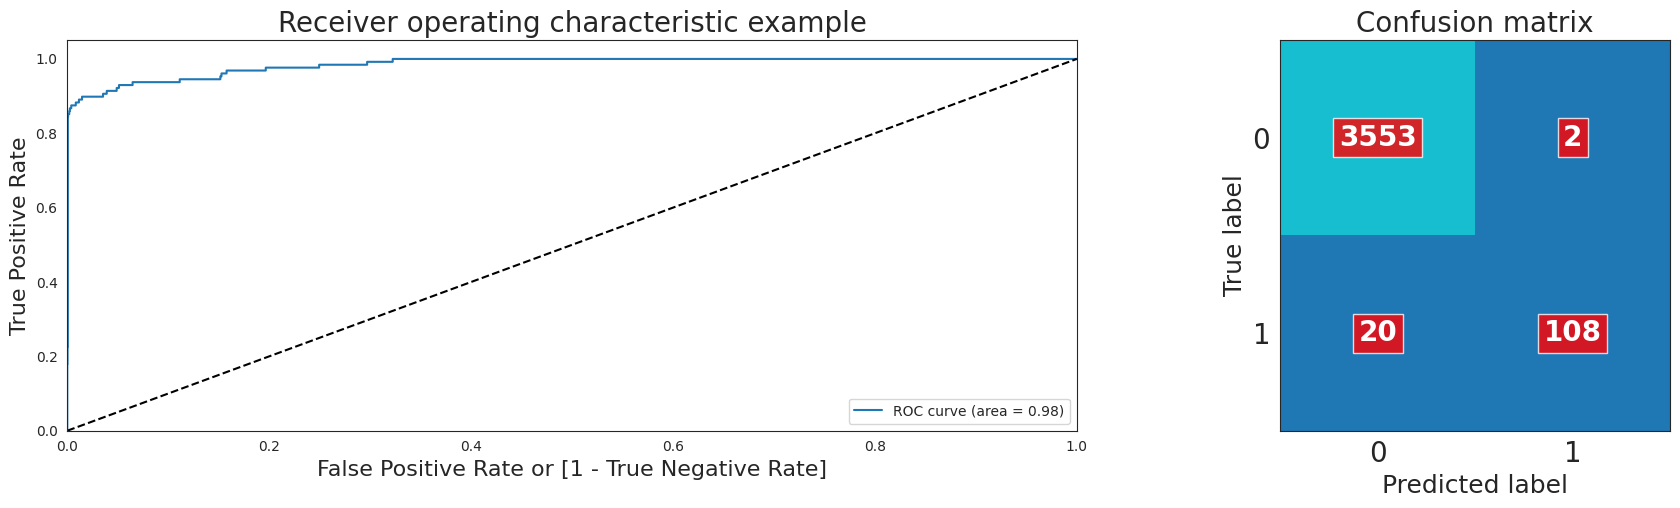

In [76]:
#Hyperparameter Turning of LogisticRegression
#Train the model with only 15 variables (identified in earlier step)

X_train_= X_train[useful_cols]
X_test_ = X_test[useful_cols]
lr = LogisticRegression(C=.1,max_iter=1000, random_state=100)
lr.fit(X_train_,y_train)

y_test_pred_logistic = lr.predict_proba(X_test_)
y_test_pred_logistic = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_logistic[:,1:2].reshape(-1) })

#check ROC_AUC Score on Test
logistic_auc_test, logistic_recall_test, logistic_precision_test, logistic_f1_test = \
                        draw_roc(y_test_pred_logistic.Class, y_test_pred_logistic.Class_Prob, True, .7)

In [77]:
### Model 2: GLM

This Model Result is for  Normal  Data
ROC AUC Score on Test: 0.98


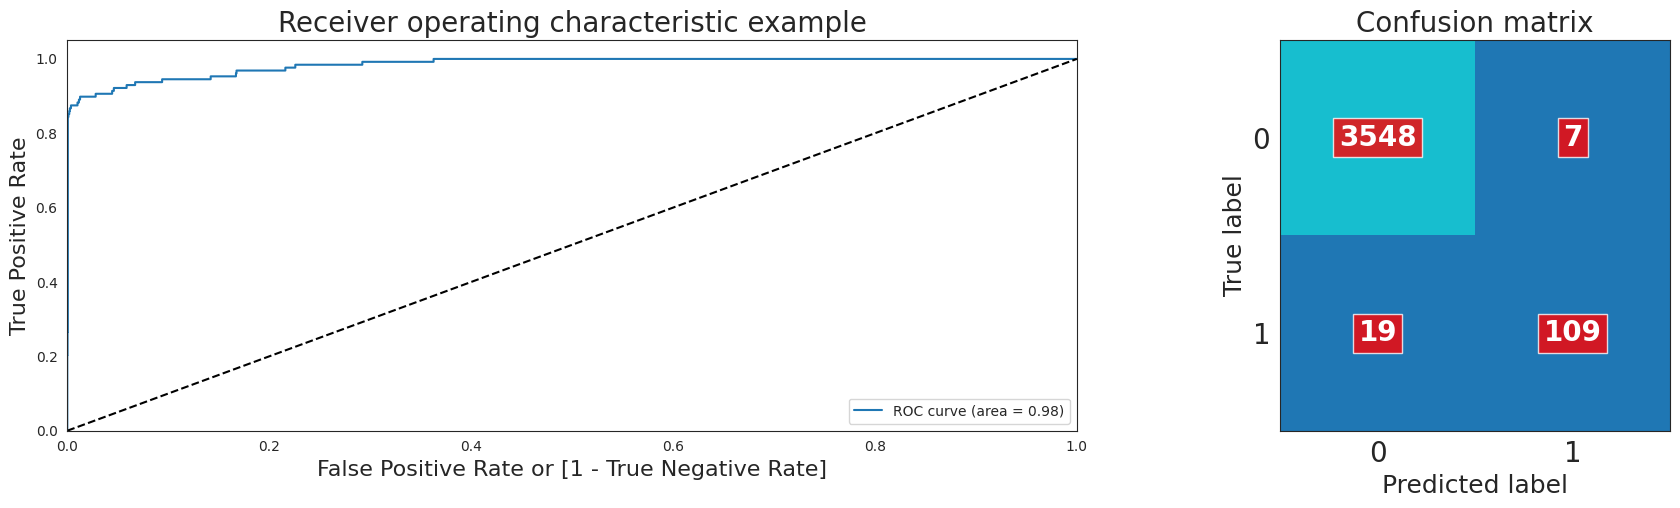

In [78]:
X_train_sm = sm.add_constant(X_train[useful_cols])
glm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
glm = glm.fit()

X_test_sm = sm.add_constant(X_test_)
y_test_pred_glm = glm.predict( X_test_sm  )
y_test_pred_glm = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_glm })

#check ROC_AUC Score on Test
glm_auc_test, glm_recall_test, glm_precision_test, glm_f1_test = \
                        draw_roc(y_test_pred_glm.Class, y_test_pred_glm.Class_Prob)

In [79]:
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                11049
Model:                            GLM   Df Residuals:                    11033
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -318.21
Date:                Sun, 10 Nov 2024   Deviance:                       636.42
Time:                        09:36:33   Pearson chi2:                 3.19e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2167
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.1816      0.228    -27.160      0.000      -6.628      -5.736
V1            -0.2998      0.141     -2.128      0.033      -0.576      -0.024
V3            -0.4912      0.146     -3.361      0.001      -0.778      -0.205
V4             1.5766      0.182      8.644      0.000       1.219       1.934
V7            -0.2283      0.109     -2.087      0.037      -0.443      -0.014
V8            -0.5219      0.091     -5.750      0.000      -0.700      -0.344
V10           -0.6113      0.174     -3.516      0.000      -0.952      -0.271
V11            0.3603      0.137      2.629      0.009       0.092       0.629
V12           -0.9841      0.159     -6.179      0.000      -1.296      -0.672
V13           -0.2457      0.115     -2.135      0.033      -0.471      -0.020
V14           -1.1008      0.147     -7.489      0.000      -1.389      -0.813
V15           -0.2344      0.116     -2.012      0.044      -0.463      -0.006
V16           -0.4572      0.135     -3.385      0.001      -0.722      -0.192
V19           -0.2907      0.114     -2.539      0.011      -0.515      -0.066
V23           -0.1584      0.073     -2.170      0.030      -0.301      -0.015
Amount         0.1379      0.123      1.117      0.264      -0.104       0.380
==============================================================================
"""

### Model 3: KNeighborsClassifier

In [80]:
# Cross validation using different values of n_neighbors.
start=timer()

if run_cv:
    hyper_params = [{'n_neighbors': range(2,15,2) }]
    knn = KNeighborsClassifier()
    model_cv_knn = GridSearchCV(estimator=knn, param_grid=hyper_params, \
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_knn.fit(X_train,  y_train)

    cv_results_knn = pd.DataFrame(model_cv_knn.cv_results_)
    print(cv_results_knn.sort_values('rank_test_score'))

end = timer()
print("Duration ",end - start)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5       0.011424      0.001301         0.237976        0.042970   
6       0.010191      0.002020         0.193988        0.049094   
3       0.007502      0.000095         0.153181        0.005949   
4       0.011130      0.000225         0.257573        0.009761   
2       0.007444      0.000410         0.151060        0.005113   
1       0.009870      0.001832         0.175893        0.044103   
0       0.014216      0.007882         0.228847        0.041876   

   param_n_neighbors               params  split0_test_score  \
5                 12  {'n_neighbors': 12}           0.958314   
6                 14  {'n_neighbors': 14}           0.957943   
3                  8   {'n_neighbors': 8}           0.958847   
4                 10  {'n_neighbors': 10}           0.958634   
2                  6   {'n_neighbors': 6}           0.959124   
1                  

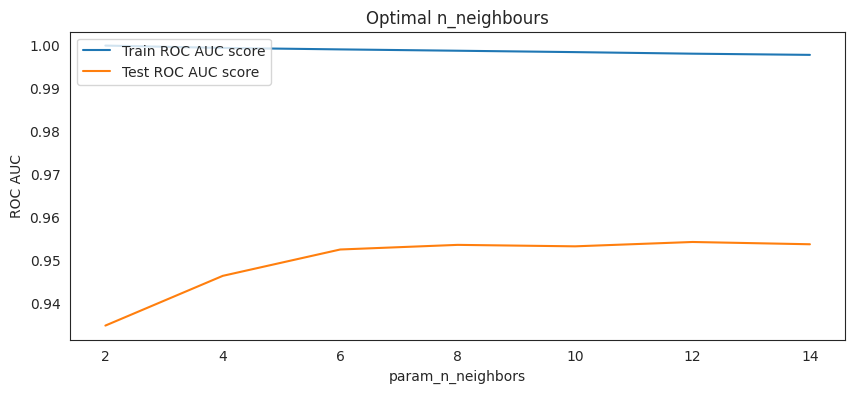

In [81]:
if run_cv:
    draw_cv_results(cv_results_knn, 'param_n_neighbors', 'ROC AUC', 'Optimal n_neighbours', False)

In [82]:
if run_cv:
    print(model_cv_knn.best_estimator_)

KNeighborsClassifier(n_neighbors=12)


This Model Result is for  Normal  Data
ROC AUC Score on Test: 0.94


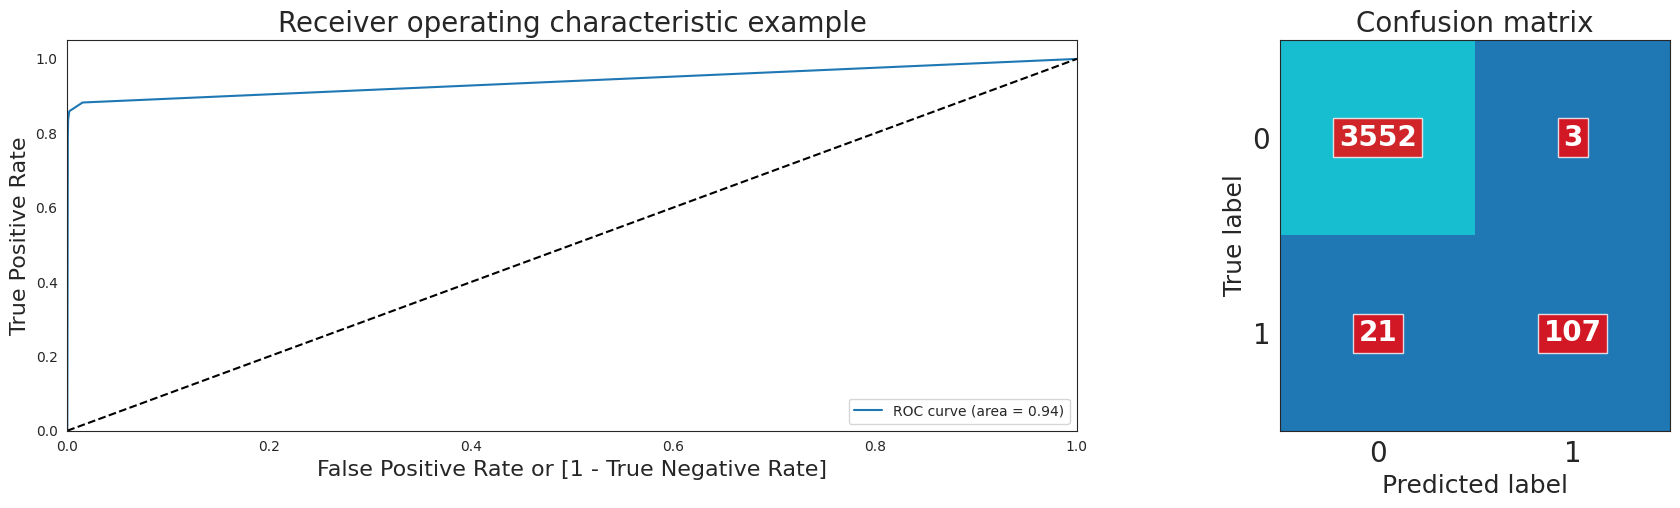

In [83]:
#Hyperparameter Turning of KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4, leaf_size=30, p=2)
knn.fit(X_train, y_train)
y_test_pred_knn = knn.predict_proba(X_test)

y_test_pred_knn = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_knn[:,1:2].reshape(-1) })


knn_auc_test, knn_recall_test, knn_precision_test,knn_f1_test = \
                        draw_roc(y_test_pred_knn.Class, y_test_pred_knn.Class_Prob)


### Model 4: RandomForestClassifier

In [84]:
# Cross validation using different values of C. Let's check which value of C gives best result
start=timer()
if run_cv:
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

    hyper_params=[{'n_estimators':range(4,20,2),'max_depth':range(8,25,2)}]

    rfc = RandomForestClassifier()
    model_cv_rfc = GridSearchCV(estimator=rfc, param_grid=hyper_params, \
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_rfc.fit(X_train,  y_train)

    cv_results_rfc = pd.DataFrame(model_cv_rfc.cv_results_)
    print(cv_results_rfc.sort_values('rank_test_score'))

end = timer()
print("Duration ",end - start)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4        0.502198      0.010535         0.007410        0.000422   
20       0.849200      0.124174         0.010358        0.002527   
21       0.798005      0.009941         0.007730        0.000150   
22       0.926257      0.027602         0.009219        0.001430   
27       1.044881      0.544442         0.009595        0.001752   
..            ...           ...              ...             ...   
40       0.246762      0.024610         0.006183        0.000212   
25       0.361005      0.009880         0.006674        0.000254   
56       0.356318      0.023790         0.009924        0.001039   
57       0.474823      0.054589         0.008291        0.001848   
48       0.259480      0.022689         0.007329        0.001294   

    param_max_depth  param_n_estimators  \
4                 8                  12   
20               12                

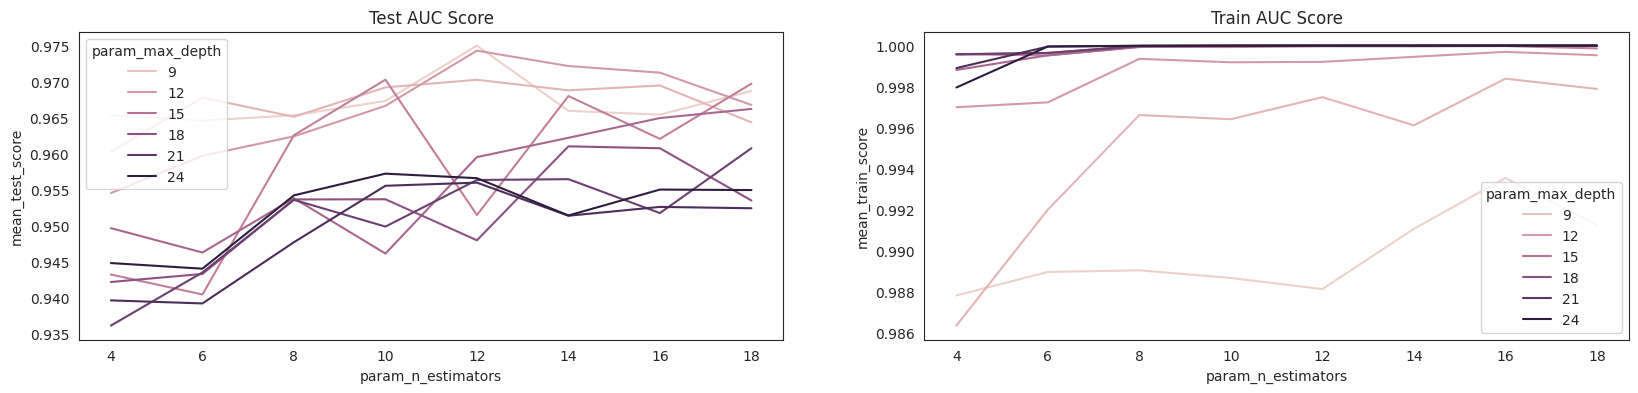

In [85]:
if run_cv:
    cv_results_rfc.param_max_depth = cv_results_rfc.param_max_depth.astype("float")
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    ax1=sns.lineplot(x='param_n_estimators',  y='mean_test_score', hue='param_max_depth', data=cv_results_rfc)
    ax1.set_title("Test AUC Score")
    plt.subplot(1,2,2)
    ax2= sns.lineplot(x='param_n_estimators', y='mean_train_score', hue='param_max_depth',data=cv_results_rfc, ci=0)
    ax2.set_title("Train AUC Score")
    plt.show()

In [86]:
if run_cv:
    print(model_cv_rfc.best_estimator_)

RandomForestClassifier(max_depth=8, n_estimators=12)


This Model Result is for  Normal  Data
ROC AUC Score on Test: 0.97


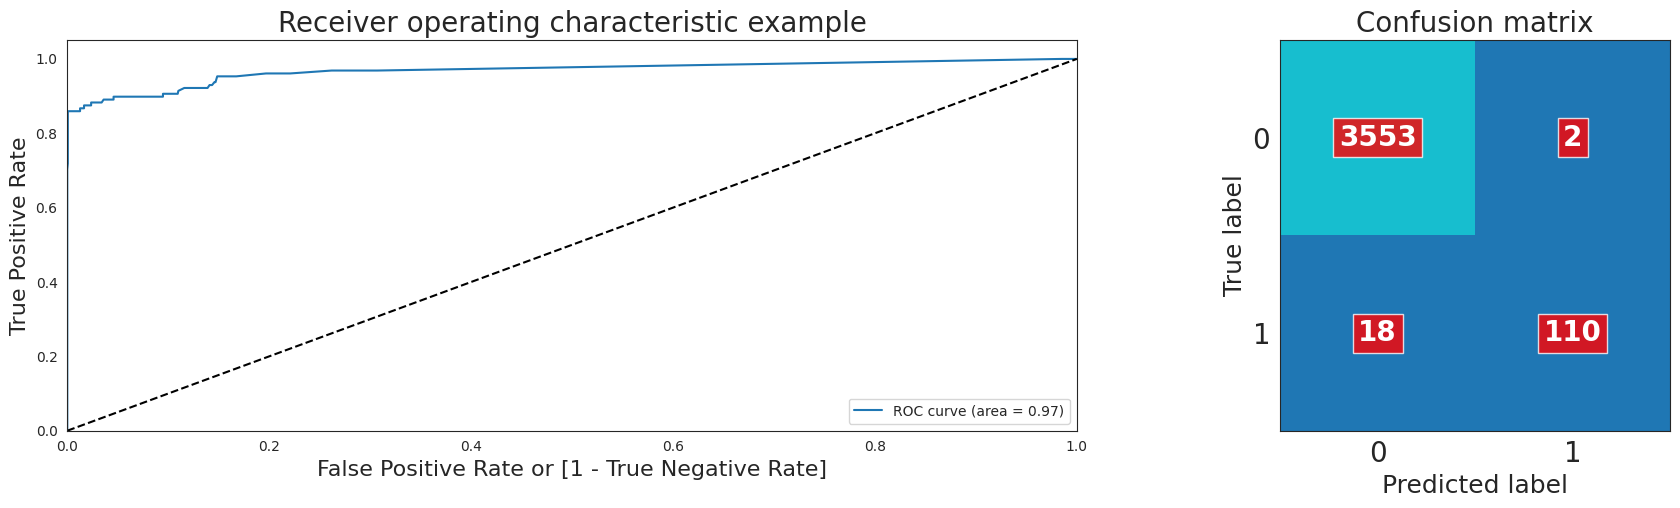

In [87]:
#Optimised Hyper Parameters
rfc= RandomForestClassifier(n_estimators=16, criterion="gini", max_depth=6, random_state=100)
rfc.fit(X_train,y_train)
y_test_pred_rfc = rfc.predict_proba(X_test)[:,1:2]

y_test_pred_rfc = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_rfc.reshape(-1) })

rfc_auc_test, rfc_recall_test, rfc_precision_test, rfc_f1_test = \
                        draw_roc(y_test_pred_rfc.Class, y_test_pred_rfc.Class_Prob)

### Model 5: DecisionTreeClassifier

In [88]:
# Cross validation using different values of C. Let's check which value of C gives best result
start=timer()

if run_cv:
    hyper_params=[{'max_depth': range(10,20,2),
               'min_samples_leaf': range(1, 5, 1),
               'min_samples_split': range(1, 5, 1) }]

    dtc = DecisionTreeClassifier(random_state=100)
    model_cv_dtc = GridSearchCV(estimator=dtc, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_dtc.fit(X_train,  y_train)

    cv_results_dtc = pd.DataFrame(model_cv_dtc.cv_results_)
    print(cv_results_dtc.sort_values('rank_test_score'))

end = timer()
print("Duration ",end - start)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
29       0.514684      0.057858         0.005290        0.000106   
30       0.490946      0.013028         0.005553        0.000678   
31       0.491088      0.017133         0.005910        0.001191   
27       0.657038      0.018905         0.008622        0.000820   
26       0.535228      0.054301         0.006301        0.001297   
..            ...           ...              ...             ...   
48       0.005627      0.000119         0.000000        0.000000   
44       0.003417      0.000238         0.000000        0.000000   
8        0.003830      0.000632         0.000000        0.000000   
64       0.003464      0.000155         0.000000        0.000000   
0        0.005243      0.001532         0.000000        0.000000   

    param_max_depth  param_min_samples_leaf  param_min_samples_split  \
29               12                       4      

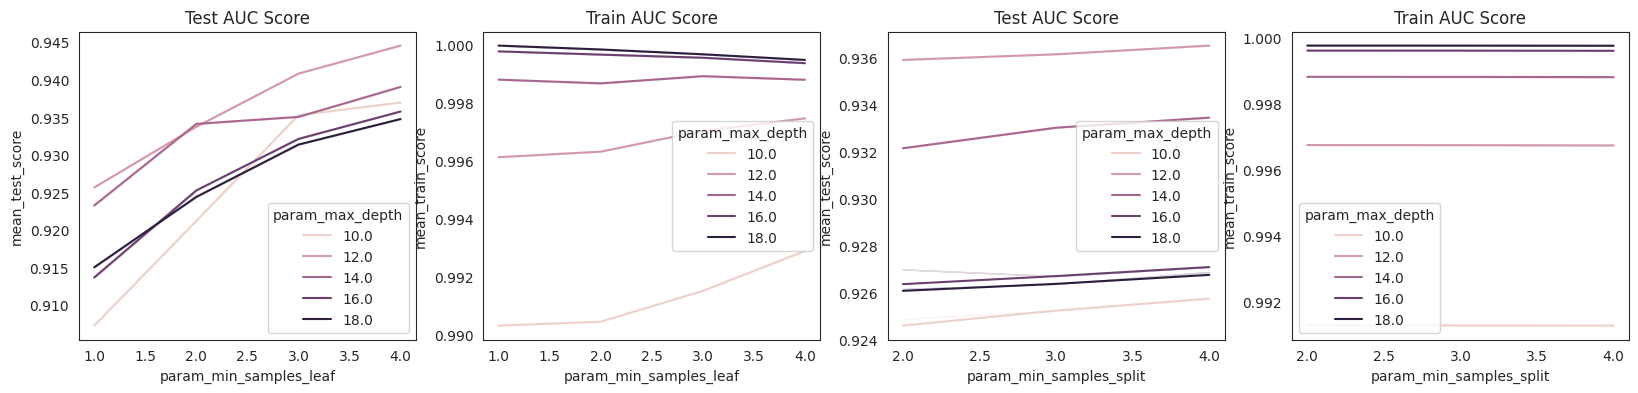

In [89]:
if run_cv:
    cv_results_dtc.param_max_depth = cv_results_dtc.param_max_depth.astype("float")

    plt.figure(figsize=(20,4))
    plt.subplot(1,4,1)
    ax1=sns.lineplot(x='param_min_samples_leaf', y='mean_test_score', hue='param_max_depth',data=cv_results_dtc, ci=0)
    ax1.set_title("Test AUC Score")
    plt.subplot(1,4,2)
    ax2= sns.lineplot(x='param_min_samples_leaf', y='mean_train_score', hue='param_max_depth',data=cv_results_dtc, ci=0)
    ax2.set_title("Train AUC Score")

    plt.subplot(1,4,3)
    ax1=sns.lineplot(x='param_min_samples_split', y='mean_test_score', hue='param_max_depth',data=cv_results_dtc, ci=0)
    ax1.set_title("Test AUC Score")
    plt.subplot(1,4,4)
    ax2= sns.lineplot(x='param_min_samples_split', y='mean_train_score', hue='param_max_depth',data=cv_results_dtc, ci=0)
    ax2.set_title("Train AUC Score")
    plt.show()

In [90]:
if run_cv:
    print(model_cv_dtc.best_estimator_)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=4, random_state=100)


This Model Result is for  Normal  Data
ROC AUC Score on Test: 0.91


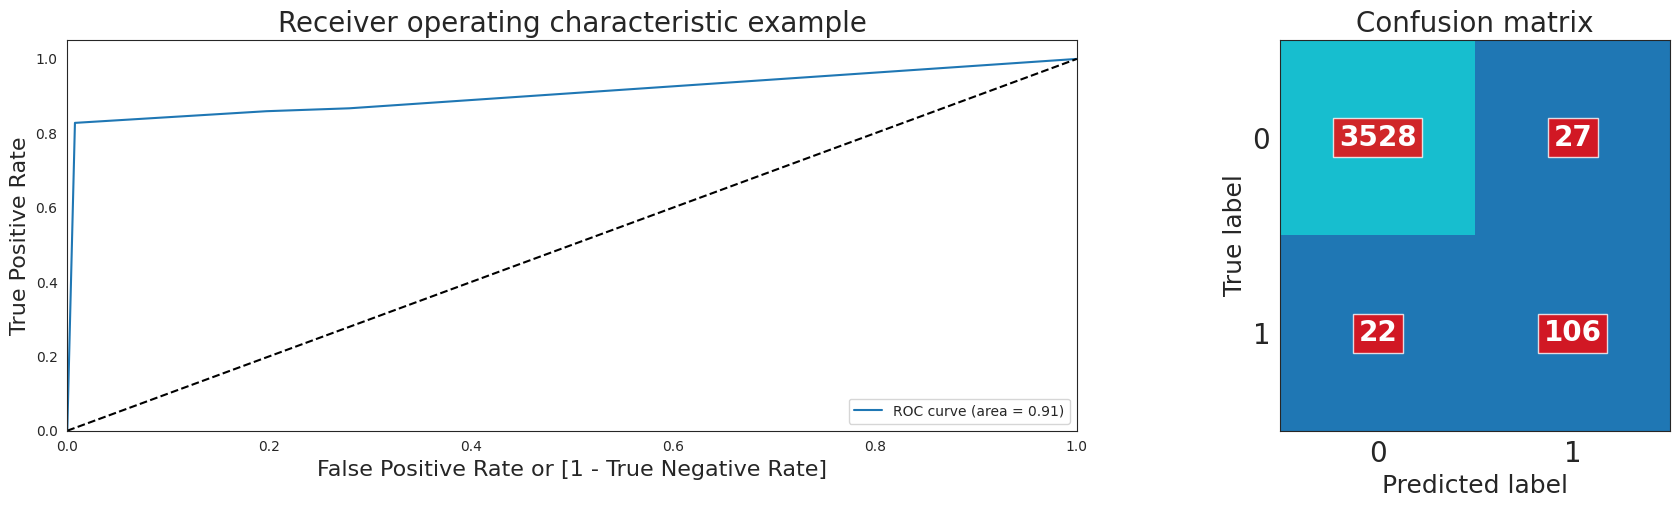

In [91]:
#Optimised Hyper Parameters
dtc= DecisionTreeClassifier(max_depth=16, min_samples_leaf=1, min_samples_split=2, random_state=100)

dtc.fit(X_train,y_train)
y_test_pred_dtc = dtc.predict_proba(X_test)[:,1:2]

y_test_pred_dtc = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_dtc.reshape(-1) })

dtc_auc_test, dtc_recall_test, dtc_precision_test, dtc_f1_test = \
                        draw_roc(y_test_pred_dtc.Class, y_test_pred_dtc.Class_Prob, True, .5)


### Model 6: LGBM

In [92]:
# Cross validation using different values of n_estimators.
start=timer()
if run_cv:
    hyper_params=[{  'n_estimators': range(10,110,10)  }]

    lgbm_clf = lgbm.LGBMClassifier(random_state=100)
    model_cv_lgbm = GridSearchCV(estimator=lgbm_clf, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_lgbm.fit(X_train,  y_train)

    cv_results_lbgm = pd.DataFrame(model_cv_lgbm.cv_results_)
    cv_results_lbgm.sort_values('rank_test_score')

end = timer()
print("Duration ",end - start)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 306, number of negative: 8533
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 8839, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034619 -> initscore=-3.328111
[LightGBM] [Info] Start training from score -3.328111
[LightGBM] [Info] Number of positive: 307, number of negative: 8532
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 8839, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034732 -> initscore=-3.324731
[LightGBM] [I

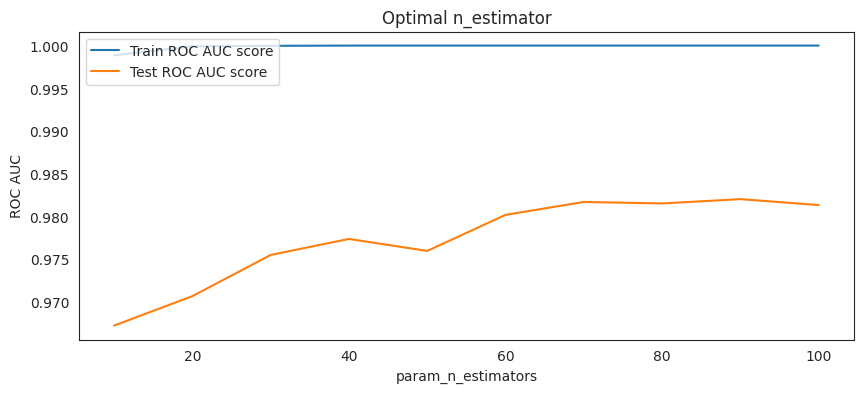

In [93]:
if run_cv:
    draw_cv_results(cv_results_lbgm, 'param_n_estimators', 'ROC AUC', 'Optimal n_estimator', False)

In [94]:
if run_cv:
    print(model_cv_lgbm.best_estimator_)

LGBMClassifier(n_estimators=90, random_state=100)


[LightGBM] [Info] Number of positive: 384, number of negative: 10665
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 11049, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034754 -> initscore=-3.324080
[LightGBM] [Info] Start training from score -3.324080
This Model Result is for  Normal  Data
ROC AUC Score on Test: 0.98


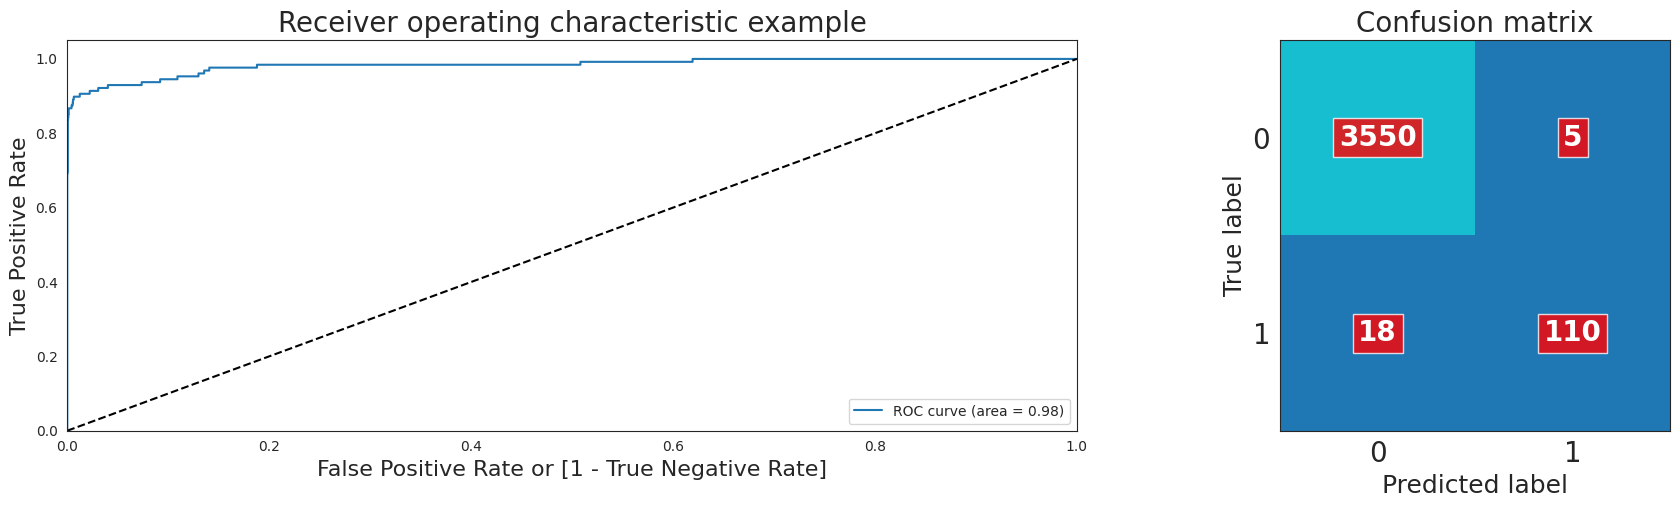

In [95]:
# Optimized Hyper Paramters.
lgbm_clf = lgbm.LGBMClassifier(n_estimators=100, random_state = 42,)

lgbm_clf.fit(X_train,y_train)
y_test_pred_lgbm = lgbm_clf.predict_proba(X_test)[:,1:2]

y_test_pred_lgbm = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_lgbm.reshape(-1) })

lgbm_auc_test, lgbm_recall_test, lgbm_precision_test, lgbm_f1_test = \
                        draw_roc(y_test_pred_lgbm.Class, y_test_pred_lgbm.Class_Prob,True,.5)

### Model 7: Perceptron

In [96]:
# Cross validation using different values of n_iter_no_change
start=timer()
if run_cv:
    hyper_params=[{'n_iter_no_change': [ 5,6,7,8,9] }]

    percept = Perceptron(random_state = 42)
    model_cv_percept = GridSearchCV(estimator=percept, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_percept.fit(X_train,  y_train)

    cv_results_percept = pd.DataFrame(model_cv_percept.cv_results_)
    cv_results_percept.sort_values('rank_test_score')

end = timer()
print("Duration ",end - start)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Duration  2.577804616999856


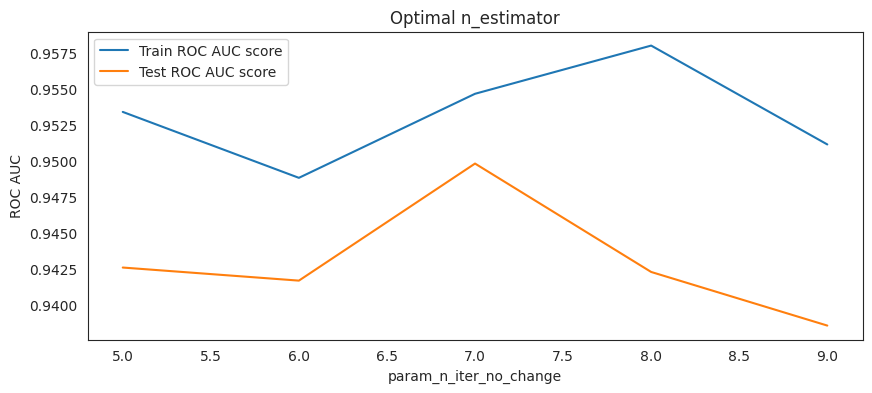

In [97]:
if run_cv:
    draw_cv_results(cv_results_percept, 'param_n_iter_no_change', 'ROC AUC', 'Optimal n_estimator', False)

In [98]:
if run_cv:
    print(model_cv_percept.best_estimator_)

Perceptron(n_iter_no_change=7, random_state=42)


This Model Result is for  Normal  Data
ROC AUC Score on Test: 0.9


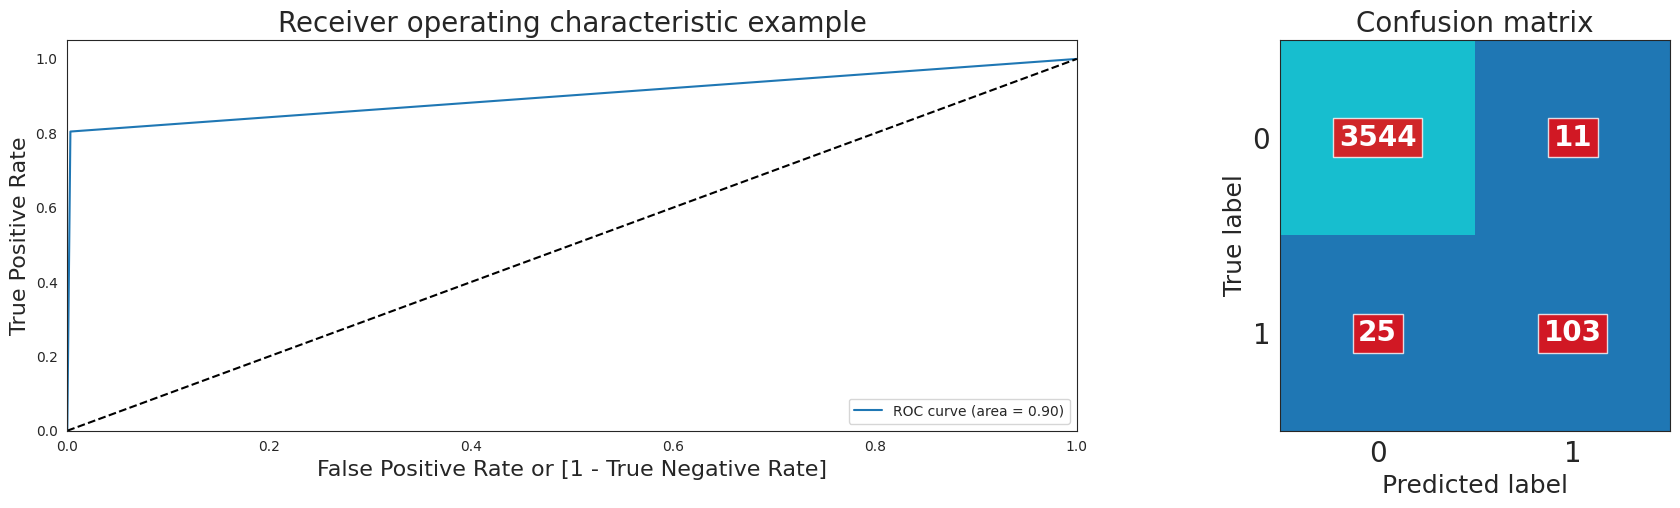

In [99]:
# Optmized Hyper Parameter
percept = Perceptron(alpha=.00001,n_iter_no_change=7,random_state = 42, penalty="l2")

percept.fit(X_train,y_train)
y_test_pred_percept = percept.predict(X_test)#[:,1:2]

y_test_pred_percept = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_percept.reshape(-1) })

percept_auc_test, percept_recall_test, percept_precision_test, percept_f1_test = \
                        draw_roc(y_test_pred_percept.Class, y_test_pred_percept.Class_Prob, False)

### Model 8: SVM

In [100]:
#hyper_params=[{'C': range(1,30,1) }]
start=timer()
if run_cv:
    hyper_params=[{'C': range(10,30,2) }]

    svm = SVC(random_state = 100)
    model_cv_svm = GridSearchCV(estimator=svm, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_svm.fit(X_train,  y_train)

    cv_results_svm = pd.DataFrame(model_cv_svm.cv_results_)
    cv_results_svm.sort_values('rank_test_score')

end = timer()
print("Duration ",end - start)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Duration  54.86321997999994


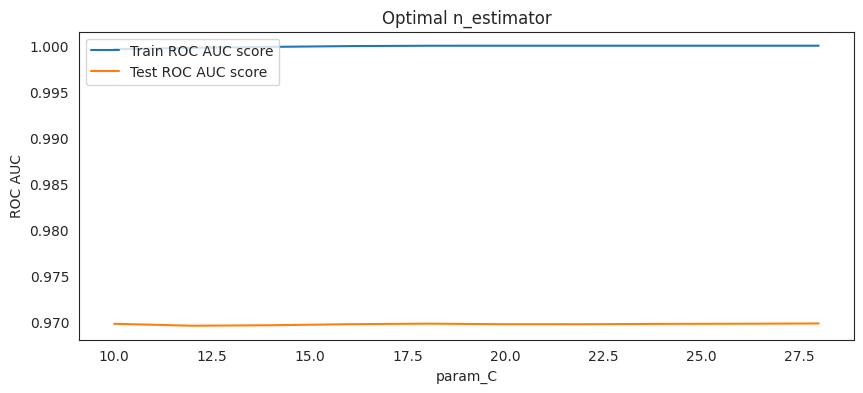

In [101]:
if run_cv:
    draw_cv_results(cv_results_svm, 'param_C', 'ROC AUC', 'Optimal n_estimator', False)

In [102]:
if run_cv:
    print(model_cv_svm.best_estimator_)

SVC(C=28, random_state=100)


This Model Result is for  Normal  Data
ROC AUC Score on Test: 0.91


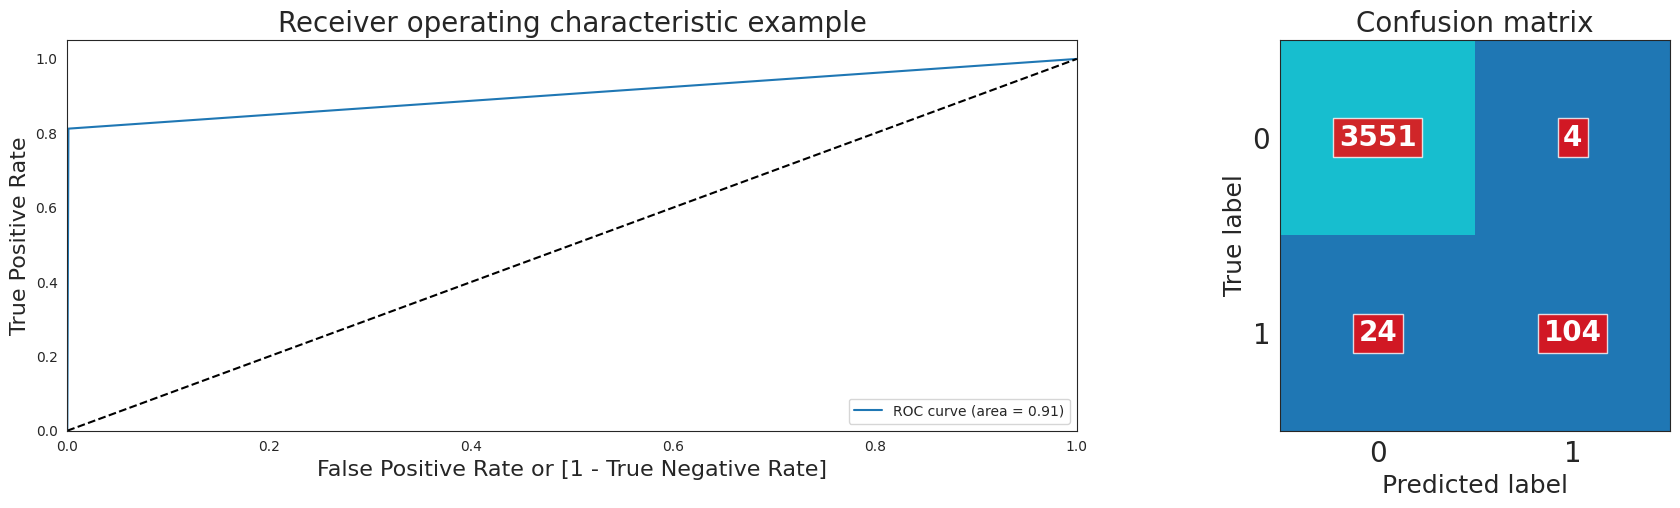

In [103]:
#Optimized Hyper Parameters
svm = SVC(C=20.0,random_state=100).fit(X_train,y_train)
y_test_pred_svm = svm.predict(X_test)#[:,1:2]
y_test_pred_svm = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_svm.reshape(-1) })

svm_auc_test, svm_recall_test, svm_precision_test, svm_f1_test = \
                        draw_roc(y_test_pred_svm.Class, y_test_pred_svm.Class_Prob, False)

In [104]:
### Model 9: XGBoost

In [105]:
#Cross Validation
start=timer()
if run_cv:
    hyper_params=[{'max_depth': range(10,15,1), 'n_estimators': range(95,120,2) }]

    xgb_clf = xgb(random_state = 100)
    model_cv_xgb = GridSearchCV(estimator=xgb_clf, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_xgb.fit(X_train,  y_train)

    cv_results_xgb = pd.DataFrame(model_cv_xgb.cv_results_)
    cv_results_xgb.sort_values('rank_test_score')

end = timer()
print("Duration ",end - start)

Fitting 5 folds for each of 65 candidates, totalling 325 fits
Duration  466.58844587800013


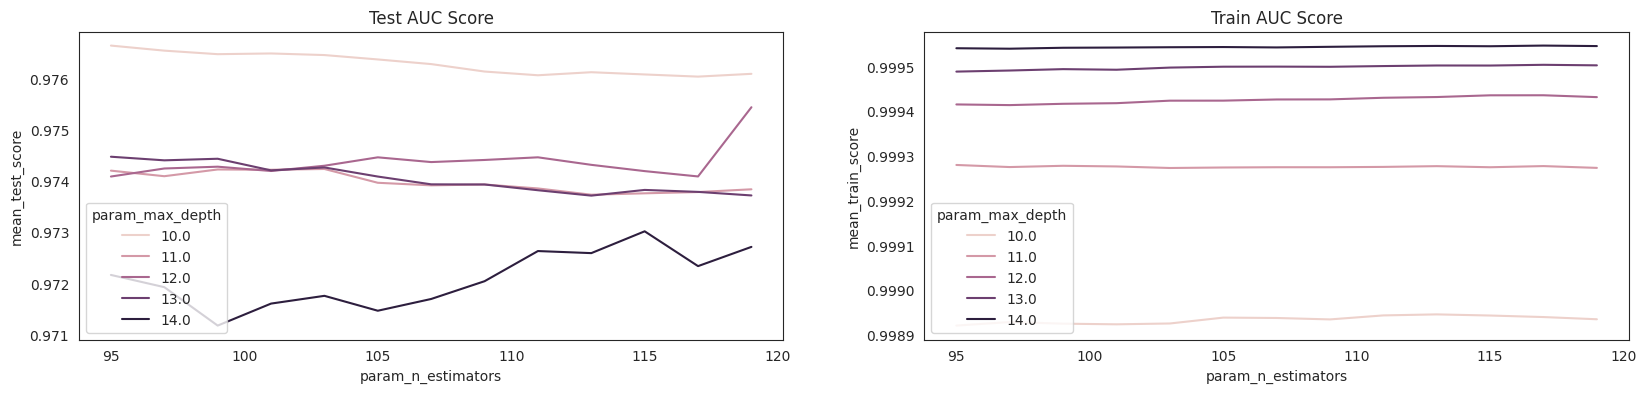

In [106]:
if run_cv:
    cv_results_xgb.param_max_depth = cv_results_xgb.param_max_depth.astype("float")
    cv_results_xgb.param_n_estimators = cv_results_xgb.param_n_estimators.astype("float")
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    ax1=sns.lineplot(x='param_n_estimators',  y='mean_test_score', hue='param_max_depth', data=cv_results_xgb)
    ax1.set_title("Test AUC Score")
    plt.subplot(1,2,2)
    ax2= sns.lineplot(x='param_n_estimators',  y='mean_train_score', hue='param_max_depth',data=cv_results_xgb)
    ax2.set_title("Train AUC Score")
    plt.show()

In [107]:
if run_cv:
    print(model_cv_xgb.best_estimator_)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=10, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=95, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=100, reg_alpha=None, ...)


This Model Result is for  Normal  Data
ROC AUC Score on Test: 0.5


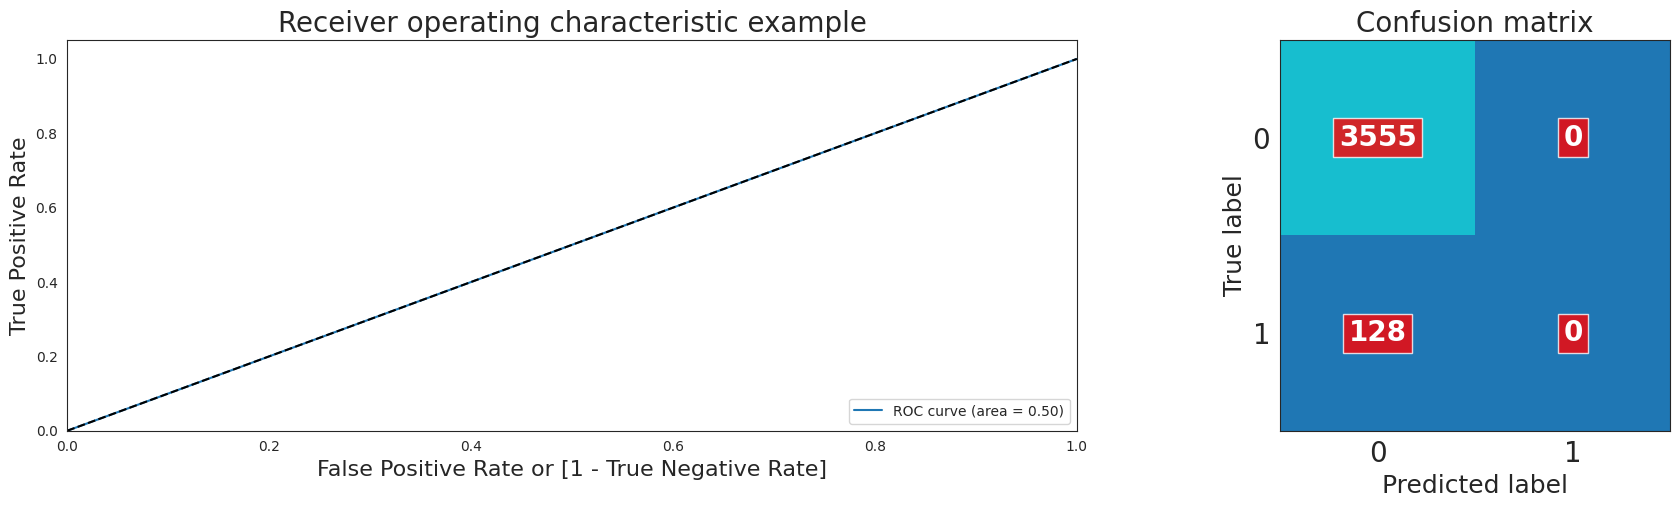

In [108]:
#Optimized Hyper Parameters
xgb_clf = xgb(max_depth=10, n_estimators=95, learning_rate=.01,random_state=100).fit(X_train,y_train)
y_test_pred_xgb = xgb_clf.predict(X_test)#[:,1:2]
y_test_pred_xgb = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_xgb.reshape(-1) })

xgb_auc_test, xgb_recall_test, xgb_precision_test, xgb_f1_test = \
                        draw_roc(y_test_pred_xgb.Class, y_test_pred_xgb.Class_Prob, True, .5)

### Modle 9: Adaboost

In [109]:
#Cross Validation
sart=timer()
if run_cv:
    hyper_params=[{'learning_rate': range(1,5,1), 'n_estimators': range(40,71,10) }]

    adbc = AdaBoostClassifier(random_state = 100)
    model_cv_adbc = GridSearchCV(estimator=adbc, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_adbc.fit(X_train,  y_train)

    cv_results_adbc = pd.DataFrame(model_cv_adbc.cv_results_)
    print(cv_results_adbc.sort_values('rank_test_score'))

end = timer()
print("Duration ",end - start)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.165243      0.117877         0.024990        0.002861   
3        3.958465      0.275135         0.039374        0.006011   
2        3.552538      0.420882         0.035578        0.004309   
1        2.881983      0.333141         0.031288        0.007793   
8        2.239030      0.279932         0.023442        0.001016   
9        2.896986      0.303895         0.031273        0.005240   
12       2.320665      0.261266         0.028441        0.006003   
13       2.846184      0.342240         0.029754        0.004267   
14       3.357028      0.276707         0.034659        0.006257   
10       3.511006      0.326391         0.041295        0.010388   
11       4.004927      0.459014         0.036125        0.001215   
15       3.879438      0.289067         0.045052        0.006225   
4        2.350952      0.285295         0.027098       

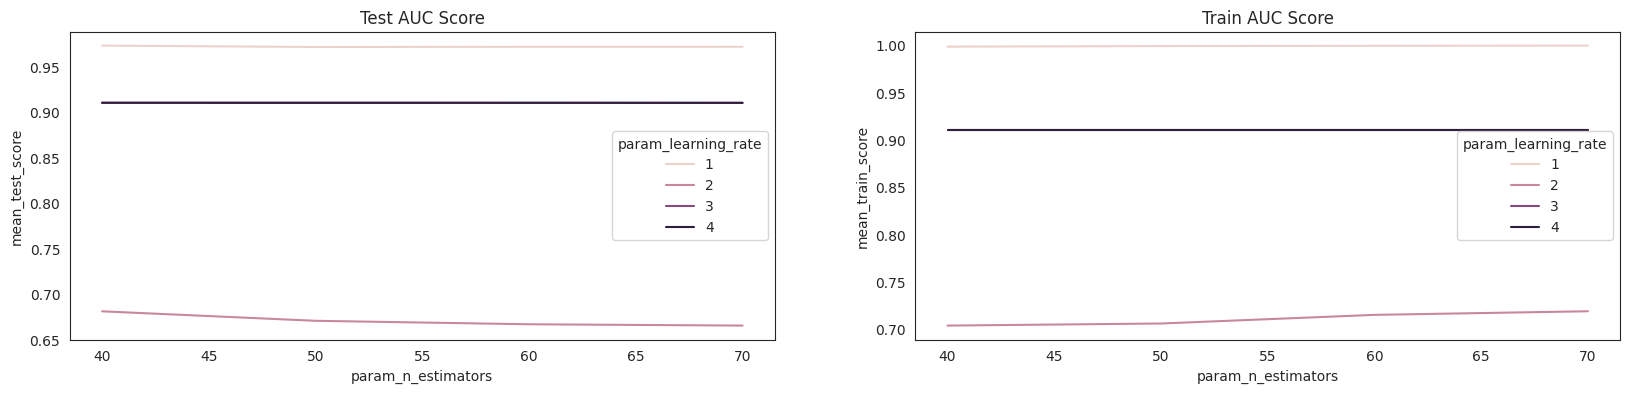

In [110]:
if run_cv:
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    ax1=sns.lineplot(x='param_n_estimators',  y='mean_test_score', hue='param_learning_rate', data=cv_results_adbc)
    ax1.set_title("Test AUC Score")
    plt.subplot(1,2,2)
    ax2= sns.lineplot(x='param_n_estimators',  y='mean_train_score', hue='param_learning_rate',data=cv_results_adbc)
    ax2.set_title("Train AUC Score")
    plt.show()

In [111]:
if run_cv:
    print(model_cv_adbc.best_estimator_)

AdaBoostClassifier(learning_rate=1, n_estimators=40, random_state=100)


This Model Result is for  Normal  Data
ROC AUC Score on Test: 0.98


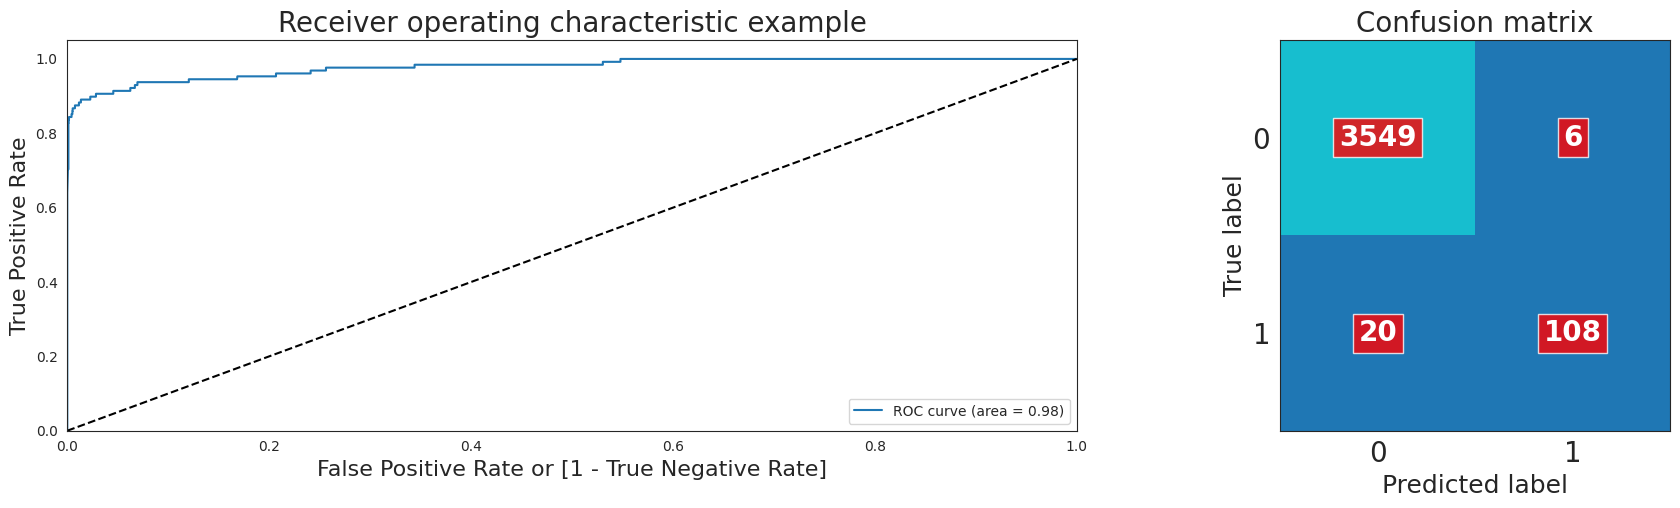

In [112]:
# Optimized Hyper Parameters
adbc = AdaBoostClassifier(learning_rate=1,random_state=100)
adbc.fit(X_train,y_train)

y_test_pred_adbc = adbc.predict_proba(X_test)[:,1:2]
y_test_pred_adbc = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_adbc.reshape(-1) })

adbc_auc_test, adbc_recall_test, adbc_precision_test, adbc_f1_test = \
                        draw_roc(y_test_pred_adbc.Class, y_test_pred_adbc.Class_Prob,True,.5)

In [113]:
adbc

AdaBoostClassifier(learning_rate=1, random_state=100)

### Modle 10: CatboostClassifier

In [114]:
# Optimized Hyper Parameters
catb_clf = CatBoostClassifier(learning_rate=1,random_state=100)
catb_clf.fit(X_train,y_train)

0:	learn: 0.0408782	total: 65.3ms	remaining: 1m 5s
1:	learn: 0.0291773	total: 77.3ms	remaining: 38.5s
2:	learn: 0.0245397	total: 88.8ms	remaining: 29.5s
3:	learn: 0.0220713	total: 100ms	remaining: 24.9s
4:	learn: 0.0207837	total: 111ms	remaining: 22.1s
5:	learn: 0.0181964	total: 122ms	remaining: 20.3s
6:	learn: 0.0167172	total: 134ms	remaining: 18.9s
7:	learn: 0.0159059	total: 145ms	remaining: 18s
8:	learn: 0.0153225	total: 157ms	remaining: 17.3s
9:	learn: 0.0148824	total: 168ms	remaining: 16.6s
10:	learn: 0.0129583	total: 179ms	remaining: 16.1s
11:	learn: 0.0122345	total: 191ms	remaining: 15.7s
12:	learn: 0.0114680	total: 202ms	remaining: 15.3s
13:	learn: 0.0111785	total: 213ms	remaining: 15s
14:	learn: 0.0087458	total: 224ms	remaining: 14.7s
15:	learn: 0.0083884	total: 235ms	remaining: 14.5s
16:	learn: 0.0074053	total: 247ms	remaining: 14.3s
17:	learn: 0.0068681	total: 258ms	remaining: 14.1s
18:	learn: 0.0065723	total: 272ms	remaining: 14s
19:	learn: 0.0063335	total: 283ms	remaining:

This Model Result is for  Normal  Data
ROC AUC Score on Test: 0.99


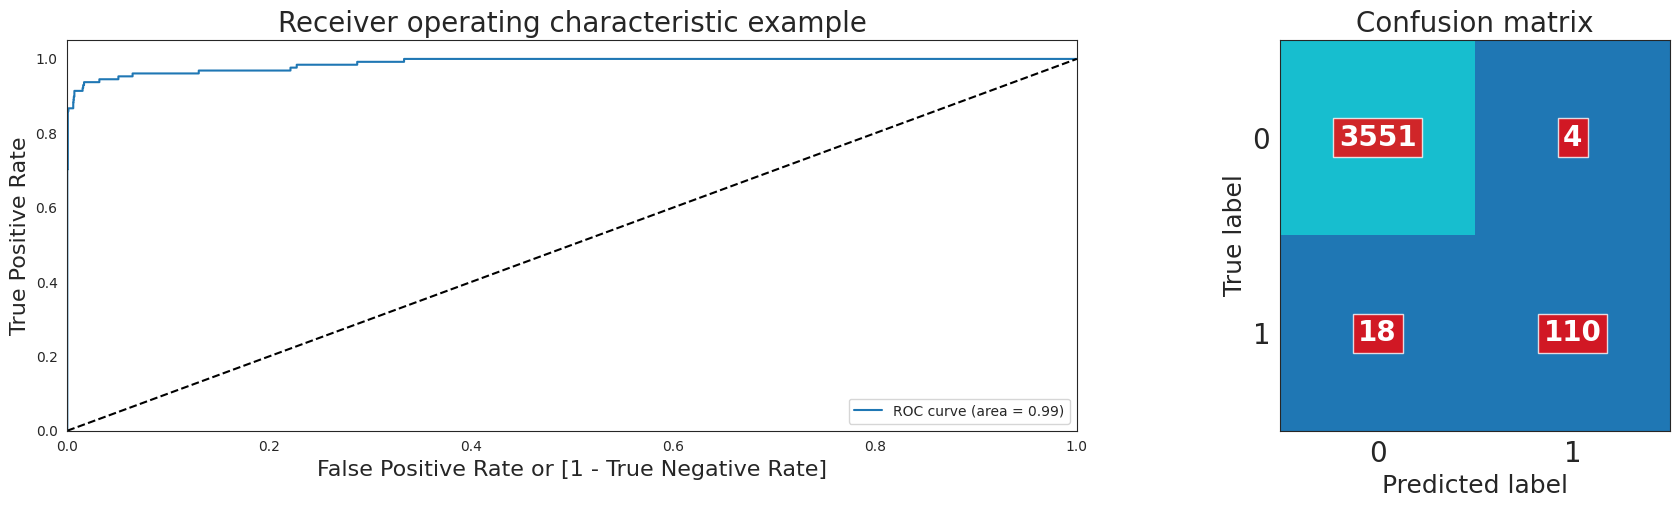

In [115]:
y_test_pred_catbc = catb_clf.predict_proba(X_test)[:,1:2]
y_test_pred_catbc = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_catbc.reshape(-1) })

catbc_auc_test, catbc_recall_test, catbc_precision_test, catbc_f1_test = \
                        draw_roc(y_test_pred_catbc.Class, y_test_pred_catbc.Class_Prob,True,.5)

### Model 11: Naive Bayes

This Model Result is for  Normal  Data
ROC AUC Score on Test: 0.97


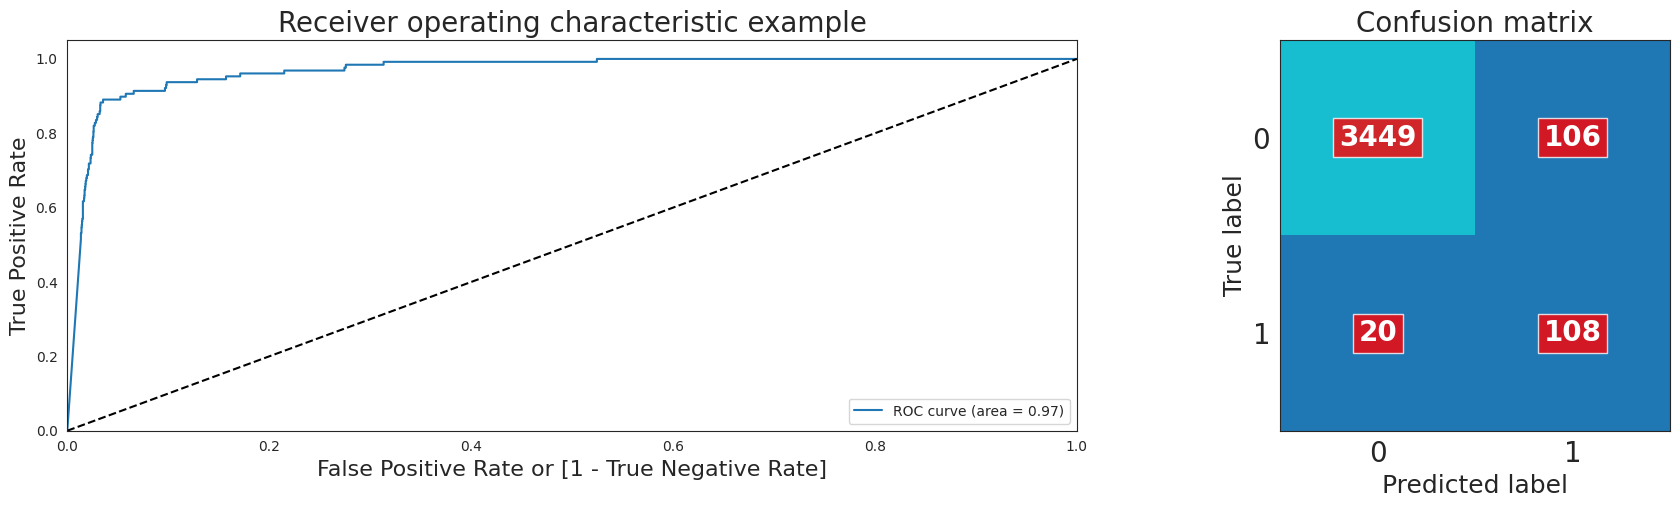

In [116]:
### Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_test_pred_gnb = gnb.predict_proba(X_test)[:,1:2]
y_test_pred_gnb = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_gnb.reshape(-1) })

gnb_auc_test, gnb_recall_test, gnb_precision_test, gnb_f1_test = \
                        draw_roc(y_test_pred_gnb.Class, y_test_pred_gnb.Class_Prob,True)

In [117]:
gnb

GaussianNB()

### Model 12: Stochastic Gradient Descent

In [120]:
# #Cross Validation
# start=timer()
# if run_cv:
#     hyper_params = [{ 'alpha': [10 ** x for x in range(-3, 1)],
#                     'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.9, 0.95, 1] }]
#     sgd = SGDClassifier(random_state=0, class_weight='balanced',\
#                         loss='log', penalty='elasticnet')

#     model_cv_sgd = GridSearchCV(estimator=sgd, param_grid=hyper_params,
#                             cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
#     model_cv_sgd.fit(X_train,  y_train)

#     cv_results_sgd = pd.DataFrame(model_cv_sgd.cv_results_)
#     cv_results_sgd.sort_values('rank_test_score')

# end = timer()
# print("Duration ",end - start)

In [119]:
#Cross Validation
start=timer()
if run_cv:
    hyper_params = [{ 'alpha': [10 ** x for x in range(-3, 1)],
                    'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.9, 0.95, 1] }]
    sgd = SGDClassifier(random_state=0, class_weight='balanced',
                        # Changed 'log' to 'log_loss'
                        loss='log_loss',
                        penalty='elasticnet')

    model_cv_sgd = GridSearchCV(estimator=sgd, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_sgd.fit(X_train,  y_train)

    cv_results_sgd = pd.DataFrame(model_cv_sgd.cv_results_)
    cv_results_sgd.sort_values('rank_test_score')

end = timer()
print("Duration ",end - start)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Duration  81.3680847200003


In [121]:
if run_cv:
    print(model_cv_sgd.best_estimator_)

SGDClassifier(alpha=0.01, class_weight='balanced', l1_ratio=0.95,
              loss='log_loss', penalty='elasticnet', random_state=0)


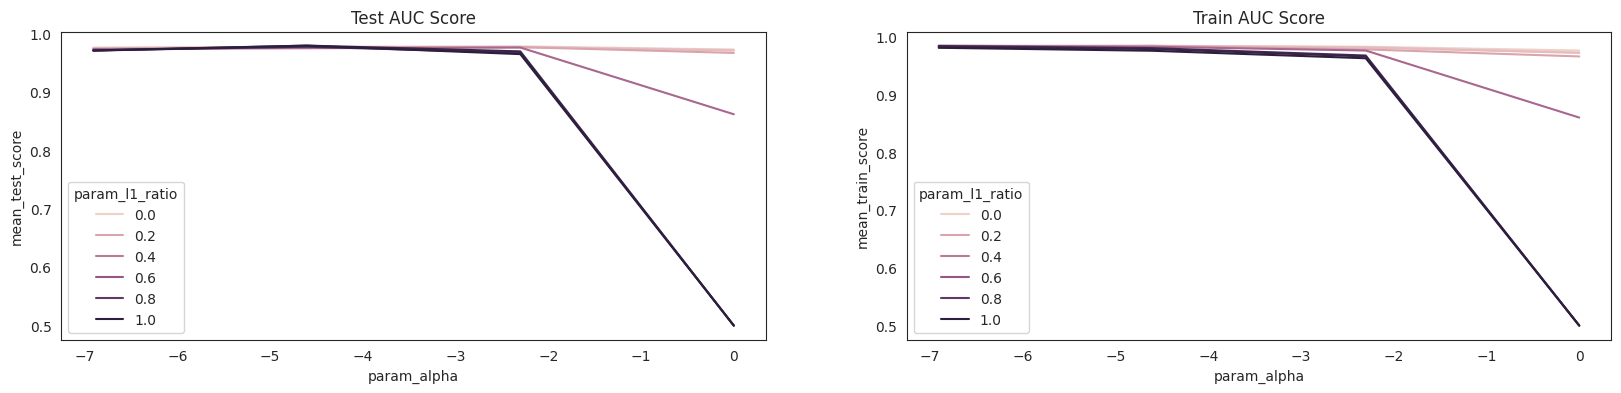

In [122]:
#draw_cv_results(cv_results_sgd, 'param_alpha', 'Recall', 'Optimal Alpha', False)
if run_cv:
    cv_results_sgd.param_l1_ratio = cv_results_sgd.param_l1_ratio.astype("float")
    cv_results_sgd.param_alpha = cv_results_sgd.param_alpha.astype("float")

    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    ax1=sns.lineplot(x= np.log(cv_results_sgd['param_alpha']), y='mean_test_score', hue='param_l1_ratio',data=cv_results_sgd)
    ax1.set_xlabel="Log Param_Alpha"
    ax1.set_title("Test AUC Score")
    plt.subplot(1,2,2)
    ax2= sns.lineplot(x=np.log(cv_results_sgd['param_alpha']), y='mean_train_score', hue='param_l1_ratio',data=cv_results_sgd)
    ax2.set_xlabel="Log Param_Alpha"
    ax2.set_title("Train AUC Score")
    plt.show()

This Model Result is for  Normal  Data
ROC AUC Score on Test: 0.97


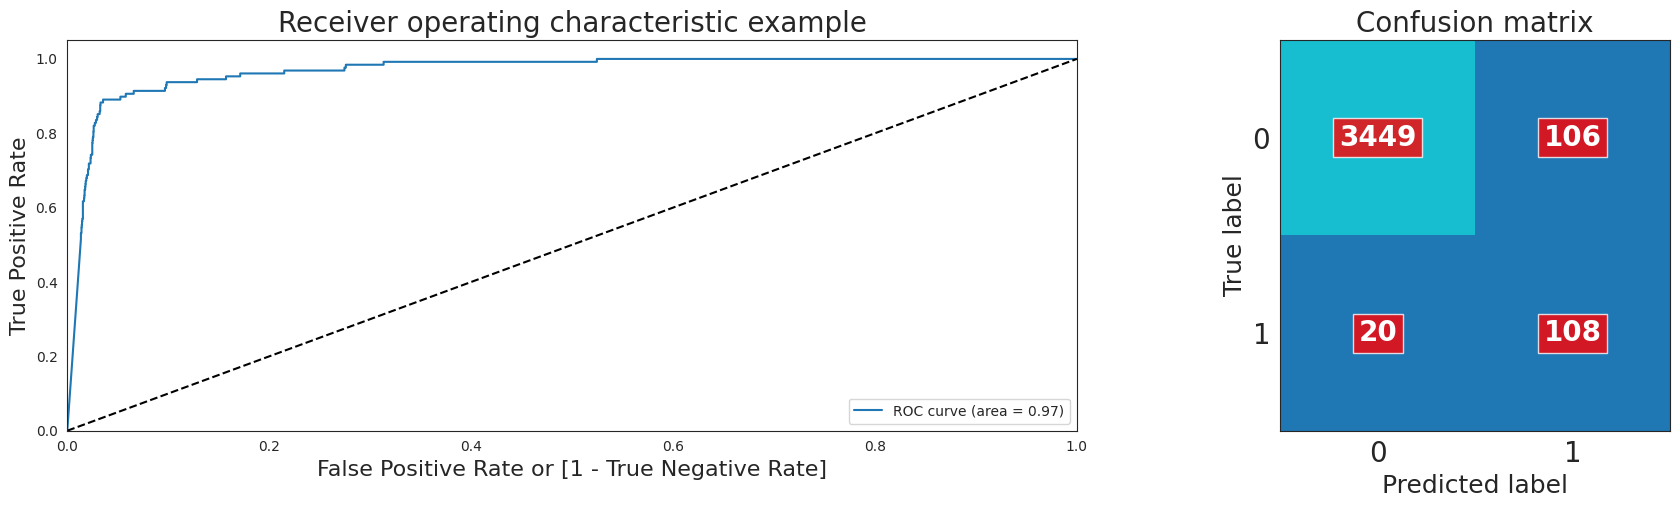

In [123]:
#Hyperparamter Tuning
sgd = SGDClassifier(max_iter=1000, random_state=100, penalty="elasticnet", alpha=0.0001, l1_ratio=0.2)
sgd.fit(X_train, y_train)

y_test_pred_sgd = sgd.predict(X_test) #[:,1:2]
y_test_pred_sgd = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_sgd  }) #.reshape(-1)

sgd_auc_test, sgd_recall_test, sgd_precision_test, sgd_f1_test = \
                        draw_roc(y_test_pred_gnb.Class, y_test_pred_gnb.Class_Prob,True)

### Model 13:  Dense Neural Network

In [124]:
def create_dnn(indput_dim, dropout=0.2):
    model = Sequential([
    Dense(units=16, input_dim=indput_dim, activation='relu'),
    Dropout(dropout),
    Dense(units=16, activation='relu'),
    Dropout(dropout),
    Dense(1, activation='sigmoid')])
    return model

dnn = create_dnn(indput_dim=X_train.shape[1], dropout=0.2)
dnn.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
dnn.fit(X_train, y_train,batch_size=100, epochs=50)

Epoch 1/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9572 - loss: 0.3179
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9695 - loss: 0.1173
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9791 - loss: 0.0857
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9868 - loss: 0.0539
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9897 - loss: 0.0451
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9916 - loss: 0.0436
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9917 - loss: 0.0405
Epoch 8/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9916 - loss: 0.0429
Epoch 9/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9933 - loss: 0.0351
Epoch 10/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9913 - loss: 0.0413
Epoch 11/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9927 - loss: 0.0349
Epoch 12/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
This Model Result is for  Normal  Data
ROC AUC Score on Test: 0.98


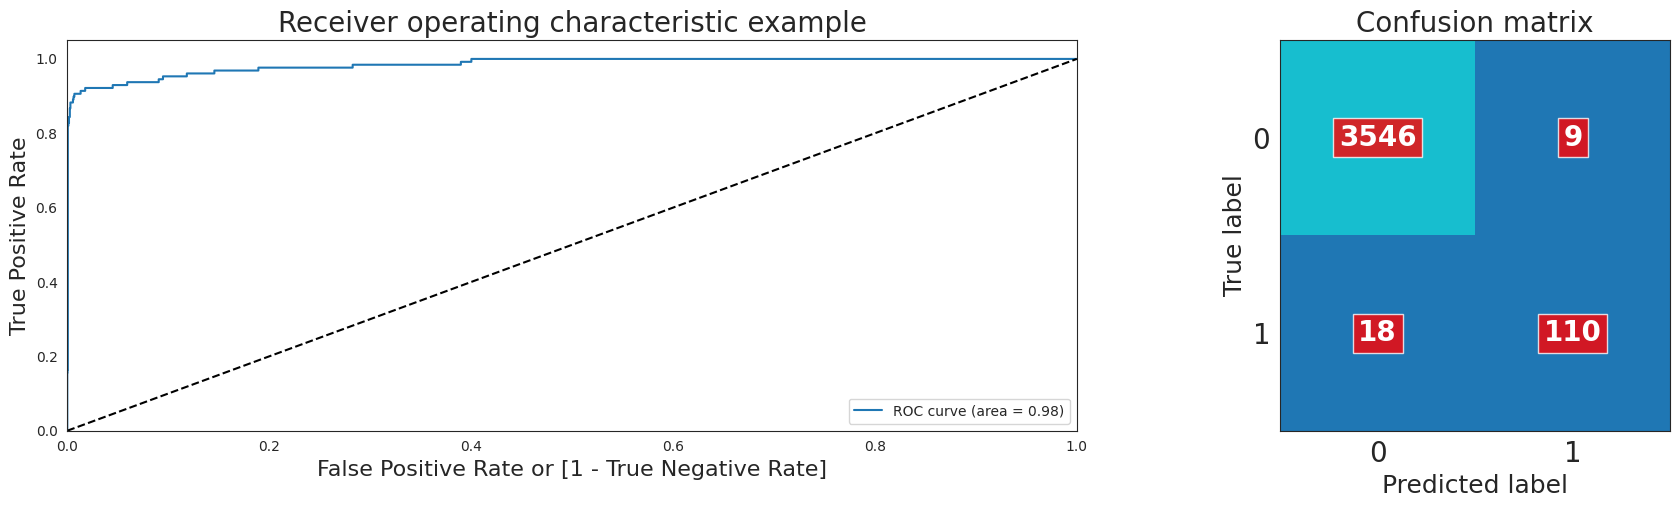

In [125]:
y_test_pred_dnn = dnn.predict(X_test).ravel()
y_test_pred_dnn = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_dnn  }) #.reshape(-1)

dnn_auc_test, dnn_recall_test, dnn_precision_test, dnn_f1_test = \
                        draw_roc(y_test_pred_dnn.Class, y_test_pred_dnn.Class_Prob,True)

### Model 14:  Convolution Neural Network

In [126]:
def create_dnn(indput_dim, dropout=0.2):
    cnn = Sequential()
    cnn.add(Conv1D(128, kernel_size = ( 5), activation='relu', padding="same",input_shape=(30, 1) ))
    cnn.add(layers.GlobalMaxPool1D())
    cnn.add(BatchNormalization())

    cnn.add(Dense(30,  activation='relu'))
    cnn.add(Dense(1, activation='sigmoid'))
    return cnn

xtrain = X_train.values.reshape(X_train.shape[0],X_train.shape[1],-1)
xtest  = X_test.values.reshape(X_test.shape[0],X_test.shape[1],-1)

cnn = create_dnn(indput_dim=xtrain.shape[1], dropout=0.2)
cnn.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
cnn.fit(xtrain, y_train,batch_size=5000, epochs=50)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.2136 - loss: 1.0266
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.4248 - loss: 0.7379
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step - accuracy: 0.7977 - loss: 0.5534
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.8837 - loss: 0.4305
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 362ms/step - accuracy: 0.9260 - loss: 0.3531
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.9429 - loss: 0.3031
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 434ms/step - accuracy: 0.9526 - loss: 0.2694
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step - accuracy: 0.9540 - loss: 0.2444
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 323ms/step - accuracy: 0.9584 - loss: 0.2265
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step - accuracy: 0.9642 - loss: 0.2125
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.9699 - loss: 0.1975
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.9746 - lo

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
This Model Result is for  Normal  Data
ROC AUC Score on Test: 0.94


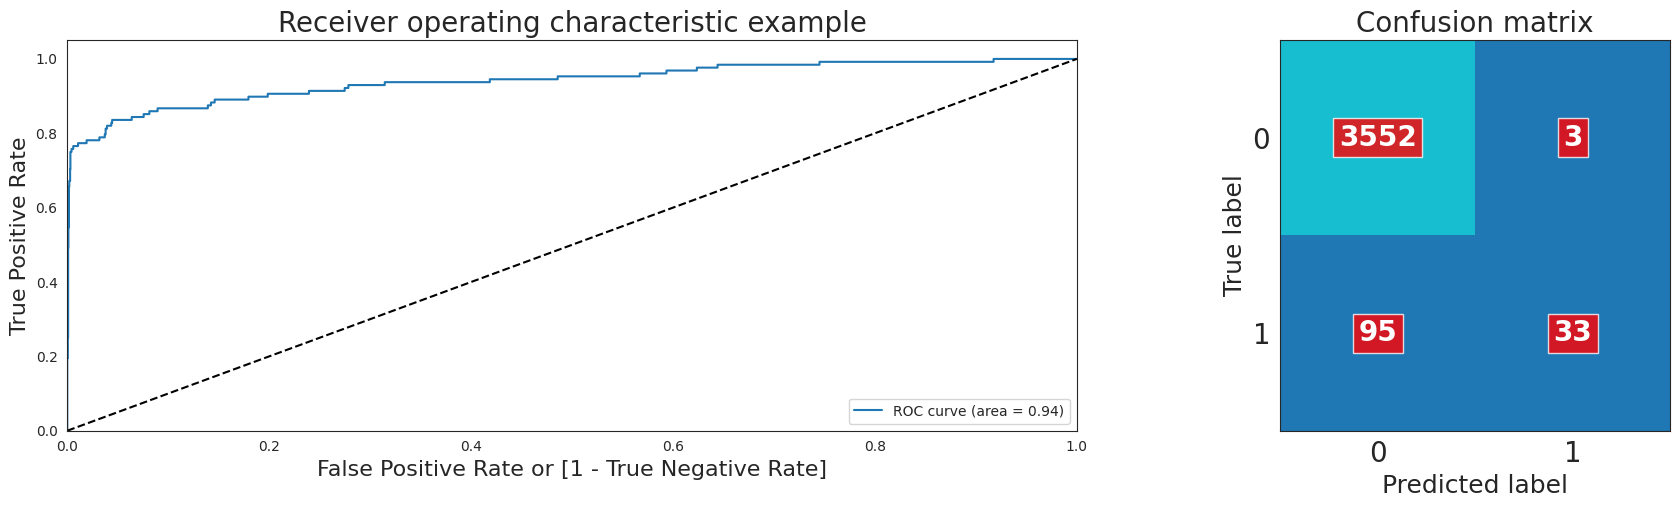

In [127]:
y_test_pred_cnn = cnn.predict(xtest).ravel()
y_test_pred_cnn = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_cnn  }) #.reshape(-1)

cnn_auc_test, cnn_recall_test, cnn_precision_test, cnn_f1_test = \
                        draw_roc(y_test_pred_cnn.Class, y_test_pred_cnn.Class_Prob,True,.7)

# <font color=blue> Section 5: Saving Results of All the Models</font>

### <font color=green> Results WITHOUT Addressing Imbalance Issue</color>

In [133]:
if option==0:
    normal_roc=[logistic_auc_test, glm_auc_test, knn_auc_test, rfc_auc_test,
                dtc_auc_test, lgbm_auc_test, percept_auc_test, svm_auc_test,
                xgb_auc_test, adbc_auc_test, catbc_auc_test, gnb_auc_test, sgd_auc_test, dnn_auc_test, cnn_auc_test]

    normal_recall=[logistic_recall_test, glm_recall_test, knn_recall_test, rfc_recall_test,
                dtc_recall_test, lgbm_recall_test, percept_recall_test, svm_recall_test,
                xgb_recall_test, adbc_recall_test, catbc_recall_test, gnb_recall_test, sgd_recall_test, dnn_recall_test, cnn_recall_test]

    normal_precision=[logistic_precision_test, glm_precision_test, knn_precision_test, rfc_precision_test,
                dtc_precision_test, lgbm_precision_test, percept_precision_test, svm_precision_test,
                xgb_precision_test, adbc_precision_test, catbc_precision_test, gnb_precision_test, sgd_precision_test, dnn_precision_test, cnn_precision_test]

    normal_f1=[logistic_f1_test, glm_f1_test, knn_f1_test, rfc_f1_test,
               dtc_f1_test, lgbm_f1_test, percept_f1_test, svm_f1_test,
               xgb_f1_test, adbc_f1_test, catbc_f1_test, gnb_f1_test, sgd_f1_test, dnn_f1_test, cnn_f1_test]

    normal_model_result = pd.DataFrame({
        'Model': ['Logistic Regression','GLM', 'KNN', 'Random Forest',
                  'Decision Tree', 'LGBM', 'Perceptron','SVM',
                  'XGBoost','AdaBoost', 'CatBoost','Naive Bayes', 'SGD', "DNN","CNN"],
        'AUC_Score': normal_roc,
        'Recall_Score': normal_recall,
        'Precision_Score': normal_precision,
        'F1_Score': normal_f1})

    print(normal_model_result.sort_values(by='AUC_Score', ascending=False))

                  Model  AUC_Score  Recall_Score  Precision_Score  F1_Score
10             CatBoost       0.99          0.86             0.96      0.91
0   Logistic Regression       0.98          0.84             0.98      0.91
1                   GLM       0.98          0.85             0.94      0.89
5                  LGBM       0.98          0.86             0.96      0.91
9              AdaBoost       0.98          0.84             0.95      0.89
13                  DNN       0.98          0.86             0.92      0.89
3         Random Forest       0.97          0.86             0.98      0.92
11          Naive Bayes       0.97          0.84             0.50      0.63
12                  SGD       0.97          0.84             0.50      0.63
2                   KNN       0.94          0.84             0.97      0.90
14                  CNN       0.94          0.26             0.92      0.40
4         Decision Tree       0.91          0.83             0.80      0.81
7           

### <font color=green> Results with RandomOverSampler</font>

In [134]:
if option==1:
    ros_roc=[logistic_auc_test, glm_auc_test, knn_auc_test, rfc_auc_test,
                dtc_auc_test, lgbm_auc_test, percept_auc_test, svm_auc_test,
                xgb_auc_test, adbc_auc_test, gnb_auc_test, sgd_auc_test]

    ros_recall=[logistic_recall_test, glm_recall_test, knn_recall_test, rfc_recall_test,
                   dtc_recall_test, lgbm_recall_test, percept_recall_test, svm_recall_test,
                   xgb_recall_test, adbc_recall_test, gnb_recall_test, sgd_recall_test]

    ros_precision=[logistic_precision_test, glm_precision_test, knn_precision_test, rfc_precision_test,
                      dtc_precision_test, lgbm_precision_test, percept_precision_test, svm_precision_test,
                      xgb_precision_test, adbc_precision_test, gnb_precision_test, sgd_precision_test]

    ros_f1=[logistic_f1_test, glm_f1_test, knn_f1_test, rfc_f1_test,
               dtc_f1_test, lgbm_f1_test, percept_f1_test, svm_f1_test,
               xgb_f1_test, adbc_f1_test, gnb_f1_test, sgd_f1_test]

    ros_model_result = pd.DataFrame({
        'Model': ['Logistic Regression','GLM', 'KNN', 'Random Forest',
                  'Decision Tree', 'LGBM', 'Perceptron','SVM',
                  'XGBoost','AdaBoost', 'Naive Bayes', 'SGD'],
        'AUC_Score':ros_roc,
        'Recall_Score': ros_recall,
        'Precision_Score': ros_precision,
        'F1_Score': ros_f1})

    print(ros_model_result.sort_values(by='AUC_Score', ascending=False))

### <font color=green> Results with Smote</font>

In [135]:
if option==2:
    smote_roc=[logistic_auc_test, glm_auc_test, knn_auc_test, rfc_auc_test,
                dtc_auc_test, lgbm_auc_test, percept_auc_test, svm_auc_test,
                xgb_auc_test, adbc_auc_test, gnb_auc_test, sgd_auc_test]

    smote_recall=[logistic_recall_test, glm_recall_test, knn_recall_test, rfc_recall_test,
                   dtc_recall_test, lgbm_recall_test, percept_recall_test, svm_recall_test,
                   xgb_recall_test, adbc_recall_test, gnb_recall_test, sgd_recall_test]

    smote_precision=[logistic_precision_test, glm_precision_test, knn_precision_test, rfc_precision_test,
                      dtc_precision_test, lgbm_precision_test, percept_precision_test, svm_precision_test,
                      xgb_precision_test, adbc_precision_test, gnb_precision_test, sgd_precision_test]

    smote_f1=[logistic_f1_test, glm_f1_test, knn_f1_test, rfc_f1_test,
               dtc_f1_test, lgbm_f1_test, percept_f1_test, svm_f1_test,
               xgb_f1_test, adbc_f1_test, gnb_f1_test, sgd_f1_test]

    smote_model_result = pd.DataFrame({
    'Model': ['Logistic Regression','GLM', 'KNN', 'Random Forest',
              'Decision Tree', 'LGBM', 'Perceptron','SVM',
              'XGBoost','AdaBoost', 'Naive Bayes', 'SGD'],
    'AUC_Score': smote_roc,
    'Recall_Score': smote_recall,
    'Precision_Score': smote_precision,
    'F1_Score': smote_f1})

    print(smote_model_result.sort_values(by='AUC_Score', ascending=False))

### <font color=green>Results with AdaSyn</font>

In [136]:
if option==3:
    adasyn_roc=[logistic_auc_test, glm_auc_test, knn_auc_test, rfc_auc_test,
                dtc_auc_test, lgbm_auc_test, percept_auc_test, svm_auc_test,
                xgb_auc_test, adbc_auc_test, gnb_auc_test, sgd_auc_test]

    adasyn_recall=[logistic_recall_test, glm_recall_test, knn_recall_test, rfc_recall_test,
                   dtc_recall_test, lgbm_recall_test, percept_recall_test, svm_recall_test,
                   xgb_recall_test, adbc_recall_test, gnb_recall_test, sgd_recall_test]

    adasyn_precision=[logistic_precision_test, glm_precision_test, knn_precision_test, rfc_precision_test,
                      dtc_precision_test, lgbm_precision_test, percept_precision_test, svm_precision_test,
                      xgb_precision_test, adbc_precision_test, gnb_precision_test, sgd_precision_test]

    adasyn_f1=[logistic_f1_test, glm_f1_test, knn_f1_test, rfc_f1_test,
               dtc_f1_test, lgbm_f1_test, percept_f1_test, svm_f1_test,
               xgb_f1_test, adbc_f1_test, gnb_f1_test, sgd_f1_test]

    adasyn_model_result = pd.DataFrame({
        'Model': ['Logistic Regression','GLM', 'KNN', 'Random Forest',
                  'Decision Tree', 'LGBM', 'Perceptron','SVM',
                  'XGBoost','AdaBoost', 'Naive Bayes', 'SGD'],
    'AUC_Score': adasyn_roc,
    'Recall_Score': adasyn_recall,
    'Precision_Score': adasyn_precision,
    'F1_Score': adasyn_f1 })

    print(adasyn_model_result.sort_values(by='AUC_Score', ascending=False))

# <font color=blue> Section 6: Comparing All the Models and all Data Imbalancing Methods</font>

### <font color=red>Before you move ahead please ensure you have run all the models with all data balancing methods. It means section 3, section 4 and Section 5 are run 4 time. 1st time for Normal (without data balancing), 2nd time for RandomOverSampler, 3rd time for Smote, 4th time for AdaSyn</font>

#### Mearge All Model, All Metrics Results Together

In [ ]:
all_models1 = pd.merge(normal_model_result,ros_model_result,how="inner", on="Model",suffixes=["_normal","_ros"])
all_models2 = pd.merge(smote_model_result,adasyn_model_result,how="inner", on="Model",suffixes=["_smote","_adasyn"])
all_models = pd.merge(all_models1,all_models2,how="inner", on="Model")

In [ ]:
all_models

In [ ]:
#AUC Score
all_models.iloc[:,[0,1,5,9,13]]
#Best AUC score on Test data with Any model is .99. This result is given the model based on LBGM, GLM algorithm.
#Smote & Adasyn both are equally good.

In [ ]:
#F1 Score
all_models.iloc[:,[0,4,8,12,16]]
#Best F1 score on Test data with Any model is .97. This result is given the model based on XGBoost algorithm.
#Smote is the best data imbalance method in this case.

In [ ]:
#Recall Score
all_models.iloc[:,[0,2,6,10,14]]
#Best Recall score on Test data with Any model is .94. This is based on threshold limit of 0.5
#This result is given the model based on Logistic Regression, LGBM, XGBoost, AdaBoost.
#Smote is the best data imbalance method in this case.

#It means .06 or 6% False Negative (Type II Error) cases with these models.
#It means pushing 6% normal transactions into fraud transaction category and taking action as per the banking processes
#This is may upset many of the bank customers. Amount money at risk because of 6% tranxs of large bank may be fraud
#is high. Therefore if you are large bank then in name of security you can afford to take such actions.

#Smaller banks will not choose the model if Recall score is high. Because many of their customers many
#switch their bank. Offcourse restricing 6% good transactions will hit them badly bad but more then
#that may be loss of customer.

In [ ]:
#Precision Score
all_models.iloc[:,[0,3,7,11,15]]
#Best Recall score on Test data with Any model is 1. This is based on threshold limit of 0.5
#This result is given the model based on GLM, RandomForest, LGBM, Perceptron,
#RandomOverSampler, Smote, AdaSyn are all are giving equally good results.

#It means thre 0% False Positive (Type I) Case. If model is predicting x number of cases fraud then
#at .5 threshold all those cases are detected correctly.

# <font color=blue>Section 7: Visuzalise Results of Various Oversampling Methods</font>

### Random Oversampling

In [ ]:
X_train_ros_1 = X_train_ros[X_train1.shape[0]:]

X_train_1 = X_train1.to_numpy()[np.where(y_train1==1.0)]
X_train_0 = X_train1.to_numpy()[np.where(y_train1==0.0)]

plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()

plt.subplot(1, 3, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ros_1.iloc[:X_train_1.shape[0], 0],
            X_train_ros_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0],
            X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### SMOTE : Synthetic Minority Over-sampling Technique

In [ ]:
X_train_smote_1 = X_train_smote[X_train1.shape[0]:]

X_train_1 = X_train1.to_numpy()[np.where(y_train1==1.0)]
X_train_0 = X_train1.to_numpy()[np.where(y_train1==0.0)]


plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()

plt.subplot(1, 3, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0],
            X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### ADASYN : Adaptive Synthetic Sampling Method

In [ ]:
X_train_adasyn_1 = X_train_adasyn[X_train1.shape[0]:]

X_train_1 = X_train1.to_numpy()[np.where(y_train1==1.0)]
X_train_0 = X_train1.to_numpy()[np.where(y_train1==0.0)]

plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()

plt.subplot(1, 3, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0],
            X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# <font color=blue> Secion 8: Final Conslusion </font>

In [ ]:
oo=option
option=2
#Imbalance Method: Smote
#Selected Algorithm: LGBM (Light Gradient Boosting Machine)

clf = lgbm.LGBMClassifier(n_estimators=100, random_state = 42,)

clf.fit(X_train_smote,y_train_smote)
y_test_pred_final = clf.predict_proba(X_test)[:,1:2]

y_test_pred_final = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_final.reshape(-1) })

final_auc_test, final_recall_test, final_precision_test, final_f1_test = \
                        draw_roc(y_test_pred_final.Class, y_test_pred_final.Class_Prob,True,.039)

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve
print ("Recall Score",final_recall_test)

print ("Precision Score",final_precision_test )

print ("F1 Score", final_f1_test )

print('Test auc =', final_auc_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred_final.Class_Prob)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Treshold",threshold)

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])
third_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-3])

print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1, X_train.columns[top_var_index])
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1, X_train.columns[second_top_var_index])
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1, X_train.columns[third_top_var_index])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples', alpha=.5)
plt.scatter( X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples', alpha=.1)
plt.xlabel(X_train.columns[top_var_index], fontsize=14)
plt.ylabel(X_train.columns[second_top_var_index], fontsize=14)
plt.title("Top 2 Variables Relationship", fontsize=20)
plt.legend()

# <font color=blue> Secion 9: Financial Benefits of the Model </font>

In [ ]:
#Total Fraud transactions in 2 days are 384. In one day 192 fraud transaction (average)
#Total normal transaction in 2 days are 284807. In one day 142,403 normal transations (average)
#Average fraud transaction is $122. In a 6 months FRAUD Tranactions of $122*6*30*192 = 42,16,320 i.e $ 4.2 million
#can happen in the bank.

#Next Six Month Approx Fraud Transactions: 34,560
#Next Six Month Approx Normal Transactions:51,265,260

#Recall score is 96% means 4% is False Negative it means everyday 8 normal transactions will be marked as fraud.
#It also means 184 tranaction out of 192 fraud transactions can be caught using our model.
#i.e. out of 34560 fraud transactions our model can detect 33120 correctly.
#And 1440 transaction will be False Negative. This can lead to customer disatisfaction.
#To avoid this bank can make 1440 immedaitely call to customer and verify.

#Precision score is 98% means 2% is False Positive it means everyday 4 fraud transactions will be marked as normal.
#It means this is loss of money.

#If bank calls to customer for the transactions which are flagged as False Positve (1440) & False Negative (720).
#If cost of each call is Rs. 10 #(let's say call centre is India) then bank need to make
#cost of the call is Rs 21,600 over 6 months.

#If developing this kind model for bank takes 2 weeks efforts. Cost of developing this model (inlcuding infrastructure,
#human resource code) can be approx $50K + Rs. 22K. Hoping we need to retrain our model every 6 months bank will be
#spending approx $25K every six month to and save $4.2 millions.